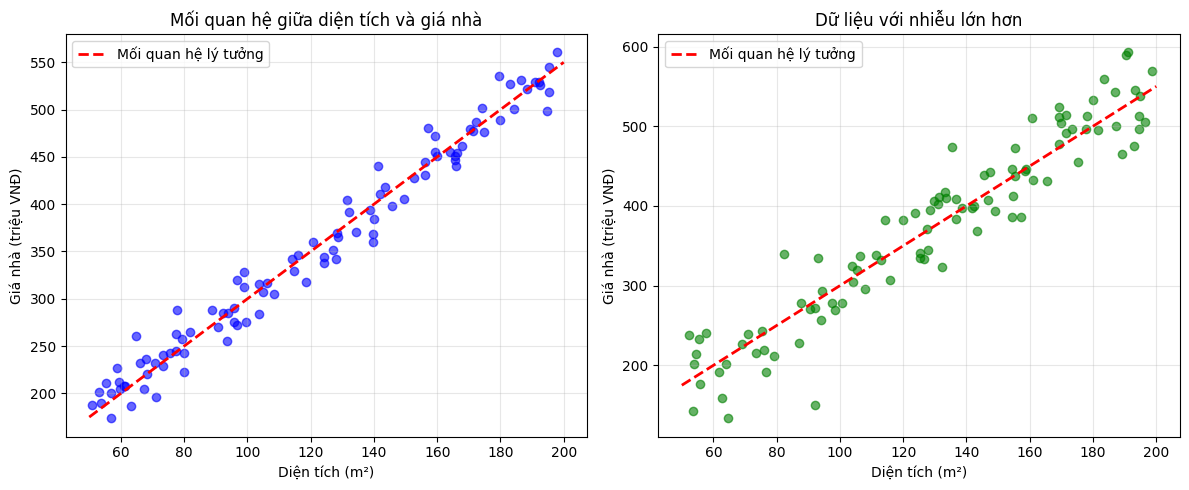

Khám phá mối quan hệ tuyến tính:
Hệ số tương quan (dữ liệu ít nhiễu): 0.987
Hệ số tương quan (dữ liệu nhiều nhiễu): 0.952


In [2]:
# =============================================================================
# IMPORT LIBRARIES - NHẬP CÁC THỨ VIỆN CẦN THIẾT
# =============================================================================

import numpy as np  
# NumPy: Thư viện toán học cơ bản cho Python
# - Làm việc với arrays (mảng) và ma trận
# - Các phép toán toán học nhanh (linear algebra)
# - Tạo số ngẫu nhiên, xử lý dữ liệu số
# VD: np.array([1,2,3]), np.random.uniform(), np.linspace()

import matplotlib.pyplot as plt
# Matplotlib: Thư viện vẽ biểu đồ chính của Python
# - plt.scatter(): vẽ biểu đồ scatter (điểm rải)
# - plt.plot(): vẽ đường thẳng, đường cong
# - plt.xlabel(), plt.ylabel(): đặt tên trục
# - plt.show(): hiển thị biểu đồ

from sklearn.linear_model import LinearRegression
# Scikit-learn: Thư viện Machine Learning phổ biến nhất Python
# - LinearRegression: class để làm hồi quy tuyến tính
# - Đã được tối ưu, dễ sử dụng với .fit(), .predict()
# - Tự động tính các hệ số a, b trong phương trình y = ax + b

from sklearn.model_selection import train_test_split
# train_test_split: Hàm chia dữ liệu thành 2 phần
# - Training set (70-80%): dùng để "dạy" mô hình
# - Test set (20-30%): dùng để kiểm tra độ chính xác
# - Tránh overfitting (học thuộc lòng thay vì học quy luật)

from sklearn.metrics import mean_squared_error, r2_score
# Metrics: Các hàm đo hiệu suất mô hình
# - mean_squared_error: Sai số bình phương trung bình (MSE)
# - r2_score: Hệ số R² (0-1, càng gần 1 càng tốt)
# - Giúp đánh giá mô hình có dự đoán chính xác không

import pandas as pd
# Pandas: Thư viện xử lý dữ liệu dạng bảng
# - DataFrame: như Excel trong Python
# - Đọc CSV, Excel, xử lý missing data
# - (Code này chưa dùng pandas, nhưng import sẵn)

import warnings
warnings.filterwarnings('ignore')
# Warnings: Tắt các cảnh báo không quan trọng
# - filterwarnings('ignore'): bỏ qua tất cả warning
# - Giúp output sạch sẽ, không bị spam thông báo

# =============================================================================
# TẠO DỮ LIỆU MẪU - SIMULATION DATA
# =============================================================================

np.random.seed(42)
# Set seed cho random number generator
# - seed(42): Đảm bảo kết quả random luôn giống nhau mỗi lần chạy
# - Quan trọng cho reproducibility (tái lập kết quả)
# - 42 là số nổi tiếng trong "Hitchhiker's Guide to Galaxy"

n_samples = 100
# Số lượng mẫu dữ liệu
# - 100 căn nhà để làm dữ liệu training
# - Đủ nhiều để thấy pattern, không quá nhiều để xử lý nhanh

# =============================================================================
# TẠO DỮ LIỆU ĐƠN GIẢN: GIÁ NHÀ DỰA TRÊN DIỆN TÍCH
# =============================================================================

dien_tich = np.random.uniform(50, 200, n_samples)
# np.random.uniform(min, max, số_lượng): Tạo số ngẫu nhiên phân phối đều
# - Diện tích từ 50m² đến 200m² 
# - Phân phối đều: mọi giá trị có xác suất bằng nhau
# - Mô phỏng diện tích nhà thực tế ở VN

gia_that = 2.5 * dien_tich + 50 + np.random.normal(0, 20, n_samples)
# Công thức tạo giá nhà thật:
# gia_that = 2.5 * dien_tich + 50 + nhiễu
# 
# Phân tích từng phần:
# - 2.5: Hệ số góc (mỗi m² tăng thêm 2.5 triệu)
# - 50: Hệ số tự do (giá cố định, VD: giá đất)
# - np.random.normal(0, 20, n_samples): Nhiễu Gaussian
#   * 0: mean (trung bình nhiễu = 0)
#   * 20: std (độ lệch chuẩn = 20 triệu)
#   * Mô phỏng các yếu tố không dự đoán được (vị trí, trang trí...)

# =============================================================================
# VẼ BIỂU ĐỒ ĐỂ HIỂU MỐI QUAN HỆ
# =============================================================================

plt.figure(figsize=(12, 5))
# Tạo figure với kích thước 12x5 inches
# - figsize=(width, height): Kích thước biểu đồ
# - 12x5: Đủ rộng để chứa 2 subplot cạnh nhau

plt.subplot(1, 2, 1)
# Chia figure thành lưới 1 hàng, 2 cột, chọn vị trí thứ 1
# - subplot(rows, cols, position): Tạo nhiều biểu đồ trong 1 figure
# - (1, 2, 1): 1 hàng, 2 cột, vị trí 1 (bên trái)

plt.scatter(dien_tich, gia_that, alpha=0.6, color='blue')
# Vẽ scatter plot (biểu đồ phân tán)
# - scatter(x, y): x=diện tích, y=giá nhà
# - alpha=0.6: Độ trong suốt (0=trong suốt, 1=đặc)
# - color='blue': Màu xanh dương
# - Mỗi điểm = 1 căn nhà với (diện tích, giá)

plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá nhà (triệu VNĐ)')
plt.title('Mối quan hệ giữa diện tích và giá nhà')
# Đặt tên cho các trục và tiêu đề
# - xlabel: tên trục hoành (X-axis)
# - ylabel: tên trục tung (Y-axis)  
# - title: tiêu đề biểu đồ

plt.grid(True, alpha=0.3)
# Vẽ lưới trên biểu đồ
# - grid(True): bật lưới
# - alpha=0.3: lưới mờ, không che mất dữ liệu

# =============================================================================
# VẼ ĐƯỜNG HỒI QUY LÝ TƯỞNG
# =============================================================================

x_ly_tuong = np.linspace(50, 200, 100)
# Tạo 100 điểm đều nhau từ 50 đến 200
# - linspace(start, stop, num): Chia đoạn [50,200] thành 100 phần bằng nhau
# - Dùng để vẽ đường thẳng mượt

y_ly_tuong = 2.5 * x_ly_tuong + 50
# Tính giá nhà theo công thức lý tưởng (KHÔNG có nhiễu)
# - y = 2.5x + 50: Đường thẳng hoàn hảo
# - Đây là "ground truth" - sự thật cần tìm

plt.plot(x_ly_tuong, y_ly_tuong, 'r--', linewidth=2, label='Mối quan hệ lý tưởng')
# Vẽ đường thẳng
# - plot(x, y): vẽ đường liền
# - 'r--': màu đỏ (r=red), nét đứt (--)
# - linewidth=2: độ dày đường = 2
# - label: tên cho legend

plt.legend()
# Hiển thị chú thích (legend) với các label đã đặt

# =============================================================================
# VẼ BIỂU ĐỒ VỚI NHIỄU NHIỀU HỚN
# =============================================================================

dien_tich_nhieu = np.random.uniform(50, 200, n_samples)
# Tạo dữ liệu diện tích mới (giống như trên)

gia_nhieu = 2.5 * dien_tich_nhieu + 50 + np.random.normal(0, 40, n_samples)
# Tạo giá nhà với NHIỄU LỚN HƠN
# - np.random.normal(0, 40): std=40 thay vì 20
# - Nhiễu gấp đôi → dữ liệu phân tán hơn
# - Mô phỏng trường hợp dữ liệu "bẩn" hơn

plt.subplot(1, 2, 2)
# Chuyển sang subplot thứ 2 (bên phải)

plt.scatter(dien_tich_nhieu, gia_nhieu, alpha=0.6, color='green')
# Vẽ scatter plot với dữ liệu nhiễu lớn
# - color='green': màu xanh lá để phân biệt

plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá nhà (triệu VNĐ)')
plt.title('Dữ liệu với nhiễu lớn hơn')
plt.grid(True, alpha=0.3)
plt.plot(x_ly_tuong, y_ly_tuong, 'r--', linewidth=2, label='Mối quan hệ lý tưởng')
plt.legend()
# Giống subplot 1, nhưng với dữ liệu nhiễu lớn hơn

plt.tight_layout()
# Tự động điều chỉnh khoảng cách giữa các subplot
# - Tránh chồng chéo text, title
# - Làm biểu đồ đẹp và dễ đọc hơn

plt.show()
# Hiển thị tất cả biểu đồ đã vẽ

# =============================================================================
# TÍNH TOÁN VÀ IN KẾT QUẢ
# =============================================================================

print("Khám phá mối quan hệ tuyến tính:")

print(f"Hệ số tương quan (dữ liệu ít nhiễu): {np.corrcoef(dien_tich, gia_that)[0,1]:.3f}")
# np.corrcoef(): Tính ma trận correlation (tương quan)
# - corrcoef(x, y): trả về ma trận 2x2
# - [0,1] hoặc [1,0]: lấy hệ số tương quan giữa x và y
# - :.3f: format số thập phân 3 chữ số
# - Correlation: -1 (nghịch biến hoàn hảo) đến +1 (đồng biến hoàn hảo)
# - Gần +1: diện tích tăng → giá tăng mạnh

print(f"Hệ số tương quan (dữ liệu nhiều nhiễu): {np.corrcoef(dien_tich_nhieu, gia_nhieu)[0,1]:.3f}")
# So sánh correlation giữa 2 dataset
# - Dataset ít nhiễu: correlation cao hơn (gần 1)
# - Dataset nhiều nhiễu: correlation thấp hơn
# - Cho thấy nhiễu làm giảm độ tương quan

# =============================================================================
# KẾT QUẢ MONG ĐỢI:
# =============================================================================
# - Biểu đồ 1: Các điểm gần đường thẳng, correlation cao (~0.9+)
# - Biểu đồ 2: Các điểm rải rác hơn, correlation thấp hơn (~0.7-0.8)
# - Cho thấy: nhiễu càng lớn → model càng khó học chính xác

In [3]:
def giai_thich_phuong_trinh_hoi_quy():
    """
    Giải thích chi tiết phương trình hồi quy tuyến tính
    """
    print("=== PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH ===")
    print()
    print("Dạng tổng quát: y = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ")
    print()
    print("Trong đó:")
    print("- y: biến mục tiêu (target variable) - giá trị chúng ta muốn dự đoán")
    print("- x₁, x₂, ..., xₙ: các biến đặc trưng (features)")
    print("- w₀: bias/intercept - giá trị y khi tất cả x = 0")
    print("- w₁, w₂, ..., wₙ: trọng số (weights) - cho biết mức độ ảnh hưởng của từng đặc trưng")
    print()
    
    # Ví dụ cụ thể
    print("Ví dụ dự đoán giá nhà:")
    print("giá_nhà = w₀ + w₁×diện_tích + w₂×số_phòng + w₃×tuổi_nhà")
    print()
    print("Nếu w₀=50, w₁=2.5, w₂=10, w₃=-0.8:")
    print("- Căn nhà 100m², 3 phòng, 5 năm tuổi:")
    
    w0, w1, w2, w3 = 50, 2.5, 10, -0.8
    dien_tich, so_phong, tuoi_nha = 100, 3, 5
    gia_du_doan = w0 + w1*dien_tich + w2*so_phong + w3*tuoi_nha
    
    print(f"  giá = {w0} + {w1}×{dien_tich} + {w2}×{so_phong} + {w3}×{tuoi_nha}")
    print(f"  giá = {w0} + {w1*dien_tich} + {w2*so_phong} + {w3*tuoi_nha}")
    print(f"  giá = {gia_du_doan} triệu VNĐ")
    print()
    print("Ý nghĩa các trọng số:")
    print(f"- w₁ = {w1}: mỗi m² tăng giá {w1} triệu")
    print(f"- w₂ = {w2}: mỗi phòng tăng giá {w2} triệu")
    print(f"- w₃ = {w3}: mỗi năm tuổi giảm giá {abs(w3)} triệu")

giai_thich_phuong_trinh_hoi_quy()

=== PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH ===

Dạng tổng quát: y = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ

Trong đó:
- y: biến mục tiêu (target variable) - giá trị chúng ta muốn dự đoán
- x₁, x₂, ..., xₙ: các biến đặc trưng (features)
- w₀: bias/intercept - giá trị y khi tất cả x = 0
- w₁, w₂, ..., wₙ: trọng số (weights) - cho biết mức độ ảnh hưởng của từng đặc trưng

Ví dụ dự đoán giá nhà:
giá_nhà = w₀ + w₁×diện_tích + w₂×số_phòng + w₃×tuổi_nhà

Nếu w₀=50, w₁=2.5, w₂=10, w₃=-0.8:
- Căn nhà 100m², 3 phòng, 5 năm tuổi:
  giá = 50 + 2.5×100 + 10×3 + -0.8×5
  giá = 50 + 250.0 + 30 + -4.0
  giá = 326.0 triệu VNĐ

Ý nghĩa các trọng số:
- w₁ = 2.5: mỗi m² tăng giá 2.5 triệu
- w₂ = 10: mỗi phòng tăng giá 10 triệu
- w₃ = -0.8: mỗi năm tuổi giảm giá 0.8 triệu


In [4]:
def giai_thich_dang_ma_tran():
    """
    Giải thích dạng ma trận của hồi quy tuyến tính
    """
    print("=== DẠNG MA TRẬN CỦA HỒI QUY TUYẾN TÍNH ===")
    print()
    
    # Tạo dữ liệu mẫu
    n_samples, n_features = 5, 3
    
    # Ma trận đặc trưng X (thêm cột 1 cho bias)
    X = np.array([
        [1, 100, 3, 5],    # 1 (bias), diện tích, số phòng, tuổi nhà
        [1, 80, 2, 10],
        [1, 120, 4, 2],
        [1, 90, 2, 8],
        [1, 150, 5, 1]
    ])
    
    # Vector trọng số
    w = np.array([50, 2.5, 10, -0.8])  # w₀, w₁, w₂, w₃
    
    # Vector mục tiêu thật
    y_that = np.array([295, 245, 368, 267, 425])
    
    print("Ma trận đặc trưng X (5 mẫu, 4 đặc trưng bao gồm bias):")
    print("      bias  diện_tích  số_phòng  tuổi_nhà")
    for i, row in enumerate(X):
        print(f"Mẫu {i+1}: {row}")
    
    print(f"\nVector trọng số w: {w}")
    print("(w₀=bias, w₁=hệ số diện tích, w₂=hệ số số phòng, w₃=hệ số tuổi nhà)")
    
    # Tính dự đoán
    y_du_doan = X @ w  # Phép nhân ma trận
    
    print(f"\nDự đoán: y = X @ w")
    print("Kết quả dự đoán:")
    for i in range(len(y_du_doan)):
        print(f"Mẫu {i+1}: {y_du_doan[i]:.1f} triệu (thực tế: {y_that[i]} triệu)")
    
    # Tính sai số
    sai_so = y_that - y_du_doan
    print(f"\nSai số trung bình: {np.mean(np.abs(sai_so)):.2f} triệu")
    print(f"Sai số bình phương trung bình: {np.mean(sai_so**2):.2f}")

giai_thich_dang_ma_tran()

=== DẠNG MA TRẬN CỦA HỒI QUY TUYẾN TÍNH ===

Ma trận đặc trưng X (5 mẫu, 4 đặc trưng bao gồm bias):
      bias  diện_tích  số_phòng  tuổi_nhà
Mẫu 1: [  1 100   3   5]
Mẫu 2: [ 1 80  2 10]
Mẫu 3: [  1 120   4   2]
Mẫu 4: [ 1 90  2  8]
Mẫu 5: [  1 150   5   1]

Vector trọng số w: [50.   2.5 10.  -0.8]
(w₀=bias, w₁=hệ số diện tích, w₂=hệ số số phòng, w₃=hệ số tuổi nhà)

Dự đoán: y = X @ w
Kết quả dự đoán:
Mẫu 1: 326.0 triệu (thực tế: 295 triệu)
Mẫu 2: 262.0 triệu (thực tế: 245 triệu)
Mẫu 3: 388.4 triệu (thực tế: 368 triệu)
Mẫu 4: 288.6 triệu (thực tế: 267 triệu)
Mẫu 5: 474.2 triệu (thực tế: 425 triệu)

Sai số trung bình: 27.84 triệu
Sai số bình phương trung bình: 910.67


=== HÀM MẤT MÁT (LOSS FUNCTION) ===

Dữ liệu mẫu:
x=1, y=2
x=2, y=4
x=3, y=6
x=4, y=8
x=5, y=10

Hệ số góc tối ưu: 1.985
MSE tối ưu: 0.002525


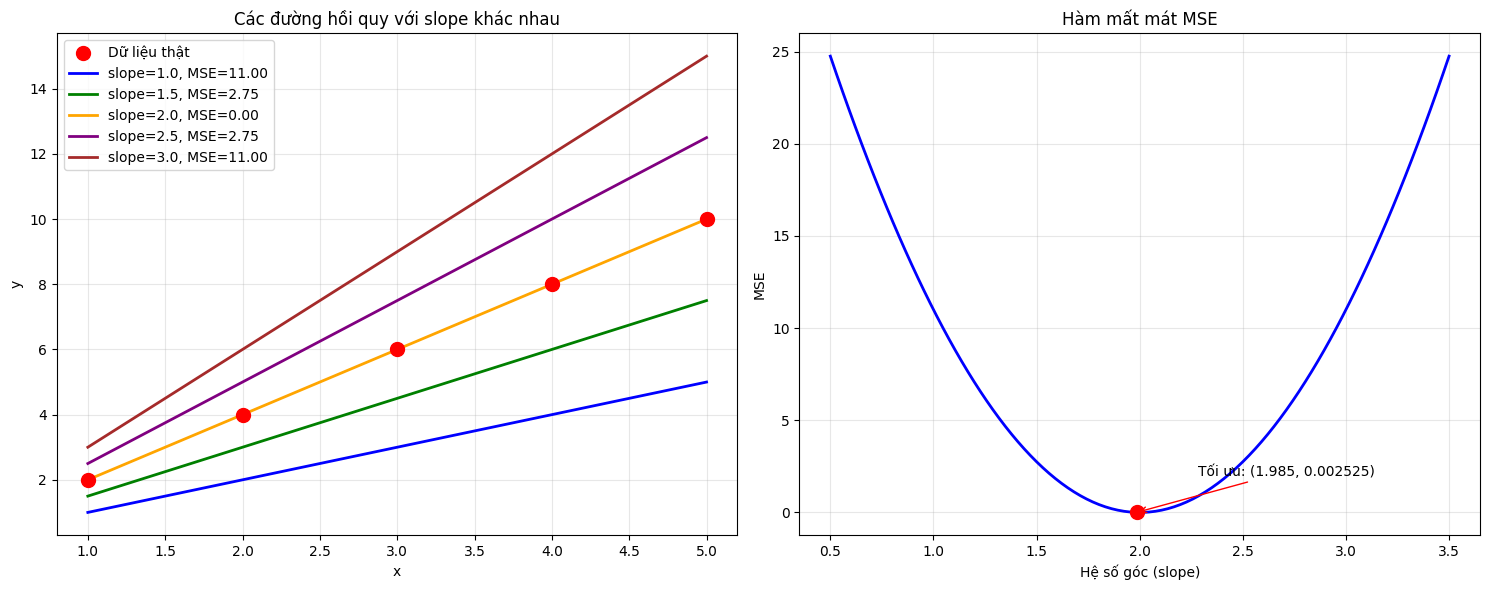

In [5]:
# =============================================================================
# HÀM MINH HỌA HÀM MẤT MÁT (LOSS FUNCTION) - TRÁI TIM CỦA MACHINE LEARNING
# =============================================================================

def minh_hoa_ham_mat_mat():
    """
    Minh họa hàm mất mát cho hồi quy tuyến tính
    
    MỤC ĐÍCH:
    - Hiểu hàm mất mát là gì và tại sao quan trọng
    - Thấy cách máy tính "học" bằng cách tối ưu hóa
    - Trực quan hóa quá trình tìm tham số tối ưu
    """
    print("=== HÀM MẤT MÁT (LOSS FUNCTION) ===")
    print()
    
    # =================================================================
    # TẠO DỮ LIỆU ĐỚN GIẢN ĐỂ DỄ HIỂU
    # =================================================================
    
    np.random.seed(42)
    # Cố định seed để kết quả luôn giống nhau
    
    x = np.array([1, 2, 3, 4, 5])
    y_that = np.array([2, 4, 6, 8, 10])  # Mối quan hệ hoàn hảo: y = 2x
    
    # GIẢI THÍCH DỮ LIỆU:
    # - x: [1, 2, 3, 4, 5] - Input features (VD: diện tích nhà)
    # - y_that: [2, 4, 6, 8, 10] - Target values (VD: giá nhà thật)
    # - Quan hệ: y = 2x (hoàn hảo, không có nhiễu)
    # - Mục tiêu: Máy tính phải TỰ TÌM ra hệ số "2" này!
    
    print("Dữ liệu mẫu:")
    for i in range(len(x)):
        print(f"x={x[i]}, y={y_that[i]}")
        # In từng cặp (input, output) để thấy rõ pattern
    
    # =================================================================
    # THỬ NHIỀU GIÁ TRỊ KHÁC NHAU CHO HỆ SỐ GÓC
    # =================================================================
    
    slopes = np.linspace(0.5, 3.5, 100)
    # Tạo 100 giá trị hệ số góc từ 0.5 đến 3.5
    # - linspace(start, stop, num): chia đều khoảng [0.5, 3.5]
    # - VD: [0.5, 0.53, 0.56, ..., 3.47, 3.5]
    # - Giống như thử 100 "guess" khác nhau cho hệ số
    
    mse_values = []
    # List để lưu giá trị MSE tương ứng với mỗi slope
    # - Sẽ có 100 giá trị MSE tương ứng 100 slopes
    
    # =================================================================
    # VÒNG LẶP TÍNH TOÁN: THỬ TỪNG HỆ SỐ VÀ TÍNH SAI SỐ
    # =================================================================
    
    for slope in slopes:
        # Với mỗi hệ số góc, ta sẽ:
        
        # 1. DỰ ĐOÁN với bias=0 để đơn giản
        y_du_doan = slope * x
        # Công thức: y = slope * x + 0
        # VD: slope=1.5 → y_du_doan = [1.5, 3.0, 4.5, 6.0, 7.5]
        
        # 2. TÍNH SAI SỐ giữa dự đoán và thực tế
        mse = np.mean((y_that - y_du_doan)**2)
        # MSE = Mean Squared Error (Sai số bình phương trung bình)
        # Công thức: MSE = (1/n) * Σ(y_thật - y_dự_đoán)²
        # 
        # Tại sao bình phương?
        # - (y_thật - y_dự_đoán) có thể âm hoặc dương
        # - Bình phương → luôn dương, không triệt tiêu nhau
        # - Phạt nặng những sai số lớn hơn sai số nhỏ
        
        mse_values.append(mse)
        # Lưu MSE vào list để vẽ biểu đồ sau
    
    # =================================================================
    # TÌM ĐIỂM TỐI ƯU - NƠI MÁY TÍNH "HỌC" ĐƯỢC
    # =================================================================
    
    min_idx = np.argmin(mse_values)
    # argmin(): tìm INDEX của giá trị nhỏ nhất trong array
    # VD: mse_values = [10, 5, 2, 8] → argmin = 2 (index của giá trị 2)
    
    slope_toi_uu = slopes[min_idx]
    # Lấy slope tương ứng với MSE nhỏ nhất
    # Đây chính là kết quả "học" của máy tính!
    
    mse_toi_uu = mse_values[min_idx]
    # MSE nhỏ nhất đạt được
    
    print(f"\nHệ số góc tối ưu: {slope_toi_uu:.3f}")
    print(f"MSE tối ưu: {mse_toi_uu:.6f}")
    # Kết quả mong đợi: slope ≈ 2.0, MSE ≈ 0 (vì dữ liệu hoàn hảo)
    
    # =================================================================
    # VẼ BIỂU ĐỒ TRỰC QUAN HÓA
    # =================================================================
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Tạo 2 subplot cạnh nhau, kích thước 15x6 inches
    # - axes[0]: Biểu đồ dữ liệu với các đường hồi quy
    # - axes[1]: Biểu đồ hàm mất mát
    
    # =================================================================
    # BIỂU ĐỒ 1: DỮ LIỆU VỚI CÁC ĐƯỜNG THẲNG KHÁC NHAU
    # =================================================================
    
    axes[0].scatter(x, y_that, color='red', s=100, label='Dữ liệu thật', zorder=3)
    # Vẽ các điểm dữ liệu thật
    # - scatter(): biểu đồ phân tán
    # - s=100: kích thước điểm
    # - zorder=3: layer cao nhất (hiện trên cùng)
    
    # Vẽ một vài đường thẳng với các slope khác nhau
    test_slopes = [1.0, 1.5, 2.0, 2.5, 3.0]
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    # 5 hệ số khác nhau để so sánh trực quan
    
    for slope, color in zip(test_slopes, colors):
        # zip(): ghép 2 list lại: (1.0, 'blue'), (1.5, 'green'), ...
        
        y_pred = slope * x
        # Tính dự đoán với slope này
        
        mse = np.mean((y_that - y_pred)**2)
        # Tính MSE cho slope này
        
        axes[0].plot(x, y_pred, color=color, linewidth=2, 
                    label=f'slope={slope}, MSE={mse:.2f}')
        # Vẽ đường thẳng
        # - plot(): vẽ đường liền
        # - label: tên hiện trong legend, bao gồm MSE
    
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_title('Các đường hồi quy với slope khác nhau')
    axes[0].legend()  # Hiển thị chú thích
    axes[0].grid(True, alpha=0.3)  # Lưới mờ
    
    # =================================================================
    # BIỂU ĐỒ 2: HÀM MẤT MÁT - TRÁI TIM CỦA MACHINE LEARNING
    # =================================================================
    
    axes[1].plot(slopes, mse_values, 'b-', linewidth=2)
    # Vẽ đường cong hàm mất mát
    # - x-axis: các giá trị slope (0.5 → 3.5)
    # - y-axis: MSE tương ứng
    # - Đường cong hình chữ U (parabola)
    
    axes[1].scatter(slope_toi_uu, mse_toi_uu, color='red', s=100, zorder=3)
    # Đánh dấu điểm tối ưu (MSE nhỏ nhất)
    # - Đây là nơi máy tính "học" được tham số tốt nhất
    
    axes[1].set_xlabel('Hệ số góc (slope)')
    axes[1].set_ylabel('MSE')
    axes[1].set_title('Hàm mất mát MSE')
    axes[1].grid(True, alpha=0.3)
    
    # Thêm chú thích cho điểm tối ưu
    axes[1].annotate(f'Tối ưu: ({slope_toi_uu:.3f}, {mse_toi_uu:.6f})', 
                     xy=(slope_toi_uu, mse_toi_uu),           # Vị trí điểm
                     xytext=(slope_toi_uu+0.3, mse_toi_uu+2), # Vị trí text
                     arrowprops=dict(arrowstyle='->', color='red'))  # Mũi tên
    # annotate(): thêm chú thích với mũi tên chỉ vào điểm quan trọng
    
    plt.tight_layout()  # Tự động căn chỉnh layout
    plt.show()          # Hiển thị biểu đồ
    
    # =================================================================
    # TRẢ VỀ KẾT QUẢ ĐỂ SỬ DỤNG TIẾP
    # =================================================================
    
    return slopes, mse_values, slope_toi_uu
    # Return 3 giá trị:
    # - slopes: tất cả hệ số đã thử
    # - mse_values: MSE tương ứng
    # - slope_toi_uu: hệ số tốt nhất tìm được

# =============================================================================
# CHẠY HÀM VÀ LƯU KẾT QUẢ
# =============================================================================

slopes, mse_values, slope_toi_uu = minh_hoa_ham_mat_mat()

# =============================================================================
# Ý NGHĨA VÀ BÀI HỌC:
# =============================================================================

# 1. HÀM MẤT MÁT LÀ GÌ?
#    - Thước đo độ "sai" của mô hình
#    - MSE: trung bình của bình phương các sai số
#    - Càng nhỏ = mô hình càng chính xác

# 2. TẠI SAO BÌNH PHƯƠNG?
#    - Tránh sai số âm/dương triệt tiêu nhau
#    - Phạt nặng sai số lớn hơn sai số nhỏ
#    - Tạo hàm convex (có 1 điểm tối ưu duy nhất)

# 3. MACHINE LEARNING = TỐI ƯU HÓA
#    - Thử nhiều tham số khác nhau
#    - Tính loss cho mỗi tham số
#    - Chọn tham số có loss nhỏ nhất
#    - Đó chính là "học"!

# 4. GRADIENT DESCENT:
#    - Thay vì thử tất cả (brute force)
#    - Dùng đạo hàm để tìm hướng giảm loss
#    - Di chuyển theo hướng đó → tìm minimum nhanh hơn

# 5. KẾT QUẢ MONG ĐỢI:
#    - Slope tối ưu ≈ 2.0 (đúng với y = 2x)
#    - MSE tối ưu ≈ 0 (vì dữ liệu hoàn hảo)
#    - Biểu đồ loss có dạng chữ U với minimum tại slope=2

In [6]:
# =============================================================================
# ĐẠO HÀM CỦA HÀM MẤT MÁT - CHÌA KHÓA CỦA GRADIENT DESCENT
# =============================================================================

def giai_thich_dao_ham_ham_mat_mat():
    """
    Giải thích cách tính đạo hàm của hàm mất mát
    
    TẠI SAO CẦN ĐẠO HÀM?
    - Đạo hàm cho biết HƯỚNG tăng/giảm nhanh nhất của hàm số
    - Trong ML: dùng để tìm hướng giảm loss function
    - Thay vì thử random → di chuyển thông minh theo gradient
    
    ANALOGY: 
    - Như đi xuống núi trong sương mù
    - Không thấy đường → cảm nhận độ dốc bằng chân
    - Bước theo hướng dốc nhất → xuống đáy nhanh nhất
    """
    print("=== ĐẠO HÀM CỦA HÀM MẤT MÁT ===")
    print()
    
    # =================================================================
    # CÔNG THỨC TOÁN HỌC CỦA HÀM MẤT MÁT
    # =================================================================
    
    print("Hàm mất mát MSE: L(w) = (1/2m) × Σ(y_thật - y_dự_đoán)²")
    print("Trong đó: y_dự_đoán = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ")
    print()
    
    # GIẢI THÍCH CÔNG THỨC:
    # L(w): Loss function phụ thuộc vào weights w
    # (1/2m): Hệ số chuẩn hóa
    #   - 1/m: chia cho số samples để có trung bình
    #   - 1/2: để khi đạo hàm, 2 trong x² sẽ triệt tiêu với 1/2
    # Σ: Tổng over tất cả training samples
    # (y_thật - y_dự_đoán)²: Bình phương sai số của mỗi sample
    
    # =================================================================
    # TÍNH ĐẠO HÀM THEO TỪNG THAM SỐ
    # =================================================================
    
    print("Đạo hàm theo w₀ (bias):")
    print("∂L/∂w₀ = -(1/m) × Σ(y_thật - y_dự_đoán)")
    print()
    
    # GIẢI THÍCH ĐẠO HÀM THEO w₀:
    # y_dự_đoán = w₀ + w₁x₁ + ... → ∂y_dự_đoán/∂w₀ = 1
    # Áp dụng chain rule:
    # ∂L/∂w₀ = ∂L/∂y_dự_đoán × ∂y_dự_đoán/∂w₀
    #         = -(y_thật - y_dự_đoán) × 1
    #         = -(y_thật - y_dự_đoán)
    # Trung bình over tất cả samples: -(1/m) × Σ(y_thật - y_dự_đoán)
    
    print("Đạo hàm theo wⱼ (j > 0):")
    print("∂L/∂wⱼ = -(1/m) × Σ(y_thật - y_dự_đoán) × xⱼ")
    print()
    
    # GIẢI THÍCH ĐẠO HÀM THEO wⱼ:
    # y_dự_đoán = w₀ + w₁x₁ + ... + wⱼxⱼ + ...
    # → ∂y_dự_đoán/∂wⱼ = xⱼ
    # Áp dụng chain rule:
    # ∂L/∂wⱼ = ∂L/∂y_dự_đoán × ∂y_dự_đoán/∂wⱼ
    #         = -(y_thật - y_dự_đoán) × xⱼ
    # Trung bình: -(1/m) × Σ(y_thật - y_dự_đoán) × xⱼ
    
    # =================================================================
    # VÍ DỤ TÍNH TOÁN CỤ THỂ
    # =================================================================
    
    print("Ví dụ tính toán:")
    
    # Tạo dữ liệu mẫu đơn giản
    X = np.array([[1, 2], [1, 4], [1, 6]])  # [bias_column, x_feature]
    y = np.array([3, 7, 11])  # Target values
    w = np.array([1, 1.5])  # [w₀_bias, w₁_weight] - trọng số hiện tại
    
    # GIẢI THÍCH DỮ LIỆU:
    # X: Ma trận features với bias column
    #   - Cột 1: [1,1,1] - bias terms (luôn = 1)
    #   - Cột 2: [2,4,6] - feature values  
    # y: [3,7,11] - target values
    # w: [1, 1.5] - current weights [bias, slope]
    
    print(f"Dữ liệu: X = {X.tolist()}, y = {y.tolist()}")
    print(f"Trọng số hiện tại: w = {w}")
    
    # =================================================================
    # BƯỚC 1: TÍNH DỰ ĐOÁN (FORWARD PASS)
    # =================================================================
    
    y_pred = X @ w  # Ma trận nhân vector
    # X @ w = [[1,2], [1,4], [1,6]] @ [1, 1.5]
    #       = [1×1 + 2×1.5, 1×1 + 4×1.5, 1×1 + 6×1.5]
    #       = [1+3, 1+6, 1+9] = [4, 7, 10]
    
    print(f"Dự đoán: y_pred = {y_pred}")
    
    # KIỂM TRA:
    # Sample 1: w₀ + w₁×x₁ = 1 + 1.5×2 = 4 ✓
    # Sample 2: w₀ + w₁×x₁ = 1 + 1.5×4 = 7 ✓  
    # Sample 3: w₀ + w₁×x₁ = 1 + 1.5×6 = 10 ✓
    
    # =================================================================
    # BƯỚC 2: TÍNH SAI SỐ (ERROR CALCULATION)
    # =================================================================
    
    errors = y - y_pred
    # errors = [3,7,11] - [4,7,10] = [-1,0,1]
    
    print(f"Sai số: errors = {errors}")
    
    # GIẢI THÍCH SAI SỐ:
    # Sample 1: 3 - 4 = -1 (dự đoán cao hơn thực tế)
    # Sample 2: 7 - 7 = 0  (dự đoán chính xác)
    # Sample 3: 11 - 10 = 1 (dự đoán thấp hơn thực tế)
    
    # =================================================================
    # BƯỚC 3: TÍNH ĐẠO HÀM (GRADIENT CALCULATION)
    # =================================================================
    
    m = len(y)  # Số lượng samples = 3
    
    # Đạo hàm theo w₀ (bias)
    dw0 = -np.mean(errors)  
    # dw0 = -mean([-1,0,1]) = -0/3 = 0
    
    # Đạo hàm theo w₁ (slope)  
    dw1 = -np.mean(errors * X[:, 1])
    # errors * X[:,1] = [-1,0,1] * [2,4,6] = [-2,0,6]
    # dw1 = -mean([-2,0,6]) = -4/3 ≈ -1.333
    
    print(f"Đạo hàm theo w₀: ∂L/∂w₀ = {dw0:.3f}")
    print(f"Đạo hàm theo w₁: ∂L/∂w₁ = {dw1:.3f}")
    
    # GIẢI THÍCH KẾT QUẢ:
    # dw0 = 0: Không cần điều chỉnh bias (errors cân bằng)
    # dw1 = -1.333: Cần TĂNG slope để giảm loss
    #   - Gradient âm → di chuyển ngược lại → tăng w₁
    
    # =================================================================
    # DẠNG MA TRẬN (VECTORIZED - HIỆU QUẢ HƠN)
    # =================================================================
    
    gradients = -(1/m) * X.T @ errors
    # X.T @ errors: Ma trận chuyển vị của X nhân với vector errors
    # X.T = [[1,1,1], [2,4,6]]  (chuyển vị của X)
    # X.T @ errors = [[1,1,1], [2,4,6]] @ [-1,0,1]
    #              = [1×(-1) + 1×0 + 1×1, 2×(-1) + 4×0 + 6×1]
    #              = [0, 4]
    # gradients = -(1/3) × [0, 4] = [0, -4/3]
    
    print(f"Gradient vector: {gradients}")
    
    # KIỂM TRA TÍNH ĐÚNG:
    # gradients[0] = 0 = dw0 ✓
    # gradients[1] = -4/3 ≈ -1.333 = dw1 ✓
    
    # =================================================================
    # GRADIENT DESCENT UPDATE STEP
    # =================================================================
    
    learning_rate = 0.01  # Tốc độ học
    w_new = w - learning_rate * gradients
    
    print(f"\nCập nhật trọng số với learning_rate = {learning_rate}:")
    print(f"w_cũ = {w}")
    print(f"w_mới = {w_new}")
    print(f"Thay đổi: Δw = {w_new - w}")
    
    # GIẢI THÍCH UPDATE:
    # w_new = w_old - α × gradient
    # - α (learning_rate): Bước nhảy (không quá lớn/nhỏ)
    # - Trừ gradient: di chuyển ngược hướng tăng → hướng giảm loss
    # 
    # w₁_new = 1.5 - 0.01×(-1.333) = 1.5 + 0.01333 ≈ 1.513
    # → Tăng slope một chút để fit data tốt hơn
    
    # =================================================================
    # TẠI SAO DÙNG DẠNG MA TRẬN?
    # =================================================================
    
    print(f"\n=== TẠI SAO DÙNG DẠNG MA TRẬN? ===")
    print("1. HIỆU QUẢ: Tính toán song song thay vì vòng lặp")
    print("2. TỔNG QUÁT: Hoạt động với bất kỳ số features nào")
    print("3. NUMPY OPTIMIZATION: Tận dụng C code bên dưới")
    print("4. DỄ HIỂU: Công thức ngắn gọn, ít lỗi")
    
    # =================================================================
    # KẾT LUẬN VÀ Ý NGHĨA
    # =================================================================
    
    print(f"\n=== KẾT LUẬN ===")
    print("- Gradient cho biết HƯỚNG và ĐỘ LỚN thay đổi weights")
    print("- Gradient âm → tăng weight, Gradient dương → giảm weight")  
    print("- Gradient = 0 → đã tối ưu (local minimum)")
    print("- Learning rate kiểm soát tốc độ hội tụ")
    
    return gradients

# =============================================================================
# CHẠY HÀM VÀ PHÂN TÍCH KẾT QUẢ
# =============================================================================

gradients = giai_thich_dao_ham_ham_mat_mat()

# =============================================================================
# TỔNG KẾT KIẾN THỨC QUAN TRỌNG
# =============================================================================

print(f"\n" + "="*60)
print("TỔNG KẾT: GRADIENT = HƯỚNG DẪN CHO MÁY HỌC")
print("="*60)

print("""
🎯 ĐẠO HÀM LÀ GÌ?
   - Độ dốc của hàm số tại 1 điểm
   - Cho biết hàm tăng/giảm nhanh thế nào
   - Trong ML: hướng để giảm loss function

🔄 GRADIENT DESCENT WORKFLOW:
   1. Tính loss với weights hiện tại
   2. Tính gradient (đạo hàm) của loss
   3. Cập nhật weights: w_new = w_old - α×gradient  
   4. Lặp lại cho đến hội tụ

🧮 CÔNG THỨC QUAN TRỌNG:
   • MSE Loss: L = (1/2m) × Σ(y_true - y_pred)²
   • Gradient: ∇L = -(1/m) × X.T @ errors
   • Update: w := w - α × ∇L

💡 TẠI SAO HIỆU QUẢ?
   - Thay vì thử random → di chuyển thông minh
   - Luôn hướng về minimum (nếu convex)
   - Tốc độ hội tụ nhanh với learning rate phù hợp

⚠️  LƯU Ý QUAN TRỌNG:
   - Learning rate quá lớn → overshooting
   - Learning rate quá nhỏ → hội tụ chậm
   - Local vs Global minimum trong non-convex functions
""")

# =============================================================================
# MINH HỌA TRỰC QUAN GRADIENT DESCENT
# =============================================================================

def minh_hoa_gradient_descent():
    """
    Minh họa trực quan quá trình gradient descent
    """
    print(f"\n=== MINH HỌA GRADIENT DESCENT ===")
    
    # Tạo dữ liệu
    np.random.seed(42)
    x = np.linspace(0, 2, 20)
    y = 3 * x + 1 + np.random.normal(0, 0.3, 20)
    X = np.column_stack([np.ones(len(x)), x])  # [bias, x]
    
    # Khởi tạo weights
    w = np.array([0.0, 0.0])  # [bias, slope]
    learning_rate = 0.1
    n_iterations = 50
    
    # Lưu lịch sử
    w_history = [w.copy()]
    loss_history = []
    
    print(f"Dữ liệu: y = 3x + 1 + noise")
    print(f"Khởi tạo: w = {w}")
    print(f"Learning rate: {learning_rate}")
    
    for i in range(n_iterations):
        # Forward pass
        y_pred = X @ w
        loss = np.mean((y - y_pred)**2)
        loss_history.append(loss)
        
        # Backward pass  
        errors = y - y_pred
        gradients = -(1/len(y)) * X.T @ errors
        
        # Update
        w = w - learning_rate * gradients
        w_history.append(w.copy())
        
        if i % 10 == 0:
            print(f"Iteration {i:2d}: loss = {loss:.4f}, w = [{w[0]:.3f}, {w[1]:.3f}]")
    
    print(f"Final: loss = {loss_history[-1]:.4f}, w = [{w[0]:.3f}, {w[1]:.3f}]")
    print(f"True weights: [1.0, 3.0]")
    print(f"Learned weights: [{w[0]:.3f}, {w[1]:.3f}]")
    
    return w_history, loss_history

# Chạy minh họa
w_history, loss_history = minh_hoa_gradient_descent()

=== ĐẠO HÀM CỦA HÀM MẤT MÁT ===

Hàm mất mát MSE: L(w) = (1/2m) × Σ(y_thật - y_dự_đoán)²
Trong đó: y_dự_đoán = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ

Đạo hàm theo w₀ (bias):
∂L/∂w₀ = -(1/m) × Σ(y_thật - y_dự_đoán)

Đạo hàm theo wⱼ (j > 0):
∂L/∂wⱼ = -(1/m) × Σ(y_thật - y_dự_đoán) × xⱼ

Ví dụ tính toán:
Dữ liệu: X = [[1, 2], [1, 4], [1, 6]], y = [3, 7, 11]
Trọng số hiện tại: w = [1.  1.5]
Dự đoán: y_pred = [ 4.  7. 10.]
Sai số: errors = [-1.  0.  1.]
Đạo hàm theo w₀: ∂L/∂w₀ = -0.000
Đạo hàm theo w₁: ∂L/∂w₁ = -1.333
Gradient vector: [ 0.         -1.33333333]

Cập nhật trọng số với learning_rate = 0.01:
w_cũ = [1.  1.5]
w_mới = [1.         1.51333333]
Thay đổi: Δw = [0.         0.01333333]

=== TẠI SAO DÙNG DẠNG MA TRẬN? ===
1. HIỆU QUẢ: Tính toán song song thay vì vòng lặp
2. TỔNG QUÁT: Hoạt động với bất kỳ số features nào
3. NUMPY OPTIMIZATION: Tận dụng C code bên dưới
4. DỄ HIỂU: Công thức ngắn gọn, ít lỗi

=== KẾT LUẬN ===
- Gradient cho biết HƯỚNG và ĐỘ LỚN thay đổi weights
- Gradient âm → tă

=== GRADIENT DESCENT ĐƠN GIẢN ===
Bắt đầu tại w = 0
Tỷ lệ học (learning rate) = 0.1

Vòng lặp | w        | f(w)     | f'(w)    | Bước tiếp theo
------------------------------------------------------------
       0 |   0.0000 |   5.0000 |  -4.0000 | w = 0.0000 - 0.1 × -4.0000 = 0.4000
       1 |   0.4000 |   3.5600 |  -3.2000 | w = 0.4000 - 0.1 × -3.2000 = 0.7200
       2 |   0.7200 |   2.6384 |  -2.5600 | w = 0.7200 - 0.1 × -2.5600 = 0.9760
       3 |   0.9760 |   2.0486 |  -2.0480 | w = 0.9760 - 0.1 × -2.0480 = 1.1808
       4 |   1.1808 |   1.6711 |  -1.6384 | w = 1.1808 - 0.1 × -1.6384 = 1.3446
       5 |   1.3446 |   1.4295 |  -1.3107 | w = 1.3446 - 0.1 × -1.3107 = 1.4757
       6 |   1.4757 |   1.2749 |  -1.0486 | w = 1.4757 - 0.1 × -1.0486 = 1.5806
       7 |   1.5806 |   1.1759 |  -0.8389 | w = 1.5806 - 0.1 × -0.8389 = 1.6645
       8 |   1.6645 |   1.1126 |  -0.6711 | w = 1.6645 - 0.1 × -0.6711 = 1.7316
       9 |   1.7316 |   1.0721 |  -0.5369 | w = 1.7316 - 0.1 × -0.5369 = 1.

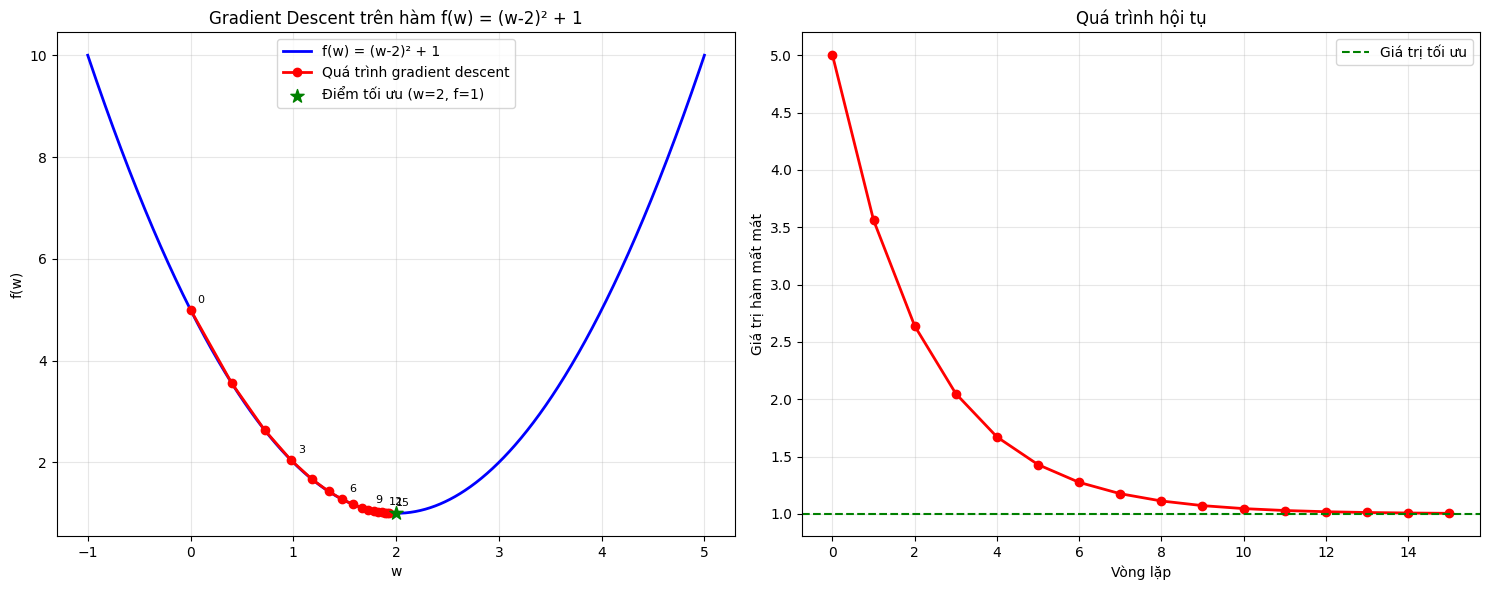

In [7]:
class GradientDescentVisualization:
    """
    Lớp minh họa thuật toán Gradient Descent
    - Mục đích: Tạo một môi trường để chạy và trực quan hóa quá trình tối ưu hóa bằng Gradient Descent
    - Ứng dụng: Giúp hiểu cách thuật toán tìm điểm tối ưu của hàm mất mát, nền tảng cho nhiều mô hình học máy
    """
    
    def __init__(self):
        # Khởi tạo danh sách để lưu lịch sử các giá trị w và f(w) trong quá trình tối ưu
        # Ứng dụng: Lịch sử này được dùng để trực quan hóa đường đi của thuật toán
        self.history = []
    
    def ham_mat_mat_don_gian(self, w):
        """
        Hàm mất mát đơn giản: f(w) = (w - 2)² + 1
        - Đây là một hàm bậc hai với cực tiểu tại w = 2, f(w) = 1
        - Lý do chọn hàm này: Dễ tính toán, có một điểm tối ưu rõ ràng, phù hợp để minh họa
        - Ứng dụng: Đại diện cho các hàm mất mát trong học máy, nơi mục tiêu là tìm tham số tối ưu
        """
        return (w - 2)**2 + 1
    
    def dao_ham_don_gian(self, w):
        """
        Đạo hàm của hàm mất mát: f'(w) = 2(w - 2)
        - Đạo hàm cho biết độ dốc của hàm tại điểm w, hướng dẫn hướng di chuyển của Gradient Descent
        - Ứng dụng: Gradient (độ dốc) là yếu tố cốt lõi để cập nhật tham số trong các mô hình học máy
        """
        return 2 * (w - 2)
    
    def gradient_descent_don_gian(self, w_start=0, learning_rate=0.1, n_iterations=20):
        """
        Thực hiện thuật toán Gradient Descent cho hàm một biến
        - w_start: Giá trị khởi tạo cho tham số w
        - learning_rate: Tốc độ học, quyết định kích thước bước di chuyển mỗi lần lặp
        - n_iterations: Số lần lặp tối đa
        - Ứng dụng: Tìm giá trị w tối ưu hóa hàm mất mát, mô phỏng việc huấn luyện mô hình học máy
        """
        print(f"=== GRADIENT DESCENT ĐƠN GIẢN ===")
        print(f"Bắt đầu tại w = {w_start}")
        print(f"Tỷ lệ học (learning rate) = {learning_rate}")
        print()
        
        # Khởi tạo tham số w tại điểm bắt đầu
        w = w_start
        # Lưu giá trị ban đầu vào lịch sử (w, f(w)) để theo dõi
        self.history = [(w, self.ham_mat_mat_don_gian(w))]
        
        # In tiêu đề bảng để theo dõi giá trị w, f(w), gradient và bước cập nhật
        print("Vòng lặp | w        | f(w)     | f'(w)    | Bước tiếp theo")
        print("-" * 60)
        
        # Vòng lặp chính của Gradient Descent
        for i in range(n_iterations):
            # Tính gradient (độ dốc) tại điểm hiện tại
            gradient = self.dao_ham_don_gian(w)
            
            # Tính giá trị hàm mất mát tại điểm hiện tại
            loss = self.ham_mat_mat_don_gian(w)
            
            # In thông tin chi tiết của vòng lặp
            print(f"{i:8d} | {w:8.4f} | {loss:8.4f} | {gradient:8.4f} | ", end="")
            
            # Cập nhật tham số w theo công thức: w_new = w - learning_rate * gradient
            # - Di chuyển ngược hướng gradient để giảm giá trị hàm mất mát
            # - Ứng dụng: Công thức này là nền tảng cho việc tối ưu hóa tham số trong học máy
            w_new = w - learning_rate * gradient
            print(f"w = {w:.4f} - {learning_rate} × {gradient:.4f} = {w_new:.4f}")
            
            # Cập nhật w và lưu vào lịch sử để trực quan hóa
            w = w_new
            self.history.append((w, self.ham_mat_mat_don_gian(w)))
            
            # Kiểm tra điều kiện dừng: nếu gradient nhỏ hơn ngưỡng 1e-6, coi như hội tụ
            # - Ứng dụng: Ngăn thuật toán chạy không cần thiết khi đã gần điểm tối ưu
            if abs(gradient) < 1e-6:
                print(f"Hội tụ tại vòng lặp {i+1}")
                break
        
        # In kết quả cuối cùng và so sánh với giá trị tối ưu lý thuyết (w = 2)
        print(f"\nKết quả cuối cùng: w = {w:.6f}")
        print(f"Giá trị tối ưu lý thuyết: w = 2.000000")
        print(f"Sai số: {abs(w - 2):.6f}")
        
        return w
    
    def visualize_gradient_descent(self):
        """
        Trực quan hóa quá trình Gradient Descent bằng hai biểu đồ:
        1. Biểu đồ hàm mất mát và đường đi của thuật toán
        2. Biểu đồ hội tụ của giá trị hàm mất mát qua các vòng lặp
        - Ứng dụng: Giúp người học hiểu trực quan cách Gradient Descent hoạt động
        """
        # Tạo mảng w để vẽ hàm mất mát (từ -1 đến 5, 1000 điểm)
        w_range = np.linspace(-1, 5, 1000)
        loss_range = [self.ham_mat_mat_don_gian(w) for w in w_range]  # Tính f(w) cho từng w
        
        # Tách lịch sử thành danh sách w và f(w) để vẽ
        w_history = [point[0] for point in self.history]
        loss_history = [point[1] for point in self.history]
        
        # Tạo figure với hai biểu đồ cạnh nhau
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Biểu đồ 1: Hàm mất mát và đường đi của Gradient Descent
        # - Vẽ hàm mất mát f(w) = (w-2)² + 1
        axes[0].plot(w_range, loss_range, 'b-', linewidth=2, label='f(w) = (w-2)² + 1')
        # - Vẽ đường đi của w qua các vòng lặp (điểm đỏ nối bằng đường)
        axes[0].plot(w_history, loss_history, 'ro-', markersize=6, linewidth=2, 
                     label='Quá trình gradient descent')
        # - Đánh dấu điểm tối ưu lý thuyết (w=2, f(w)=1) bằng dấu sao xanh
        axes[0].scatter(2, 1, color='green', s=100, marker='*', 
                       label='Điểm tối ưu (w=2, f=1)', zorder=5)
        
        # Đánh số các bước (mỗi 3 bước để tránh rối)
        # - Ứng dụng: Giúp theo dõi thứ tự các điểm trong quá trình tối ưu
        for i, (w, loss) in enumerate(self.history[::3]):  
            axes[0].annotate(f'{i*3}', (w, loss), xytext=(5, 5), 
                           textcoords='offset points', fontsize=8)
        
        # Cấu hình biểu đồ 1
        axes[0].set_xlabel('w')
        axes[0].set_ylabel('f(w)')
        axes[0].set_title('Gradient Descent trên hàm f(w) = (w-2)² + 1')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Biểu đồ 2: Hội tụ của giá trị hàm mất mát
        # - Vẽ giá trị f(w) qua các vòng lặp
        axes[1].plot(range(len(loss_history)), loss_history, 'r-', linewidth=2, marker='o')
        # - Vẽ đường ngang tại giá trị tối ưu lý thuyết (f(w)=1)
        axes[1].axhline(y=1, color='green', linestyle='--', label='Giá trị tối ưu')
        # Cấu hình biểu đồ 2
        axes[1].set_xlabel('Vòng lặp')
        axes[1].set_ylabel('Giá trị hàm mất mát')
        axes[1].set_title('Quá trình hội tụ')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Điều chỉnh bố cục và hiển thị biểu đồ
        plt.tight_layout()
        plt.show()

# Minh họa thuật toán
gd_viz = GradientDescentVisualization()  # Tạo instance của lớp
# Chạy Gradient Descent với w khởi đầu = 0, learning rate = 0.1, tối đa 15 vòng lặp
w_final = gd_viz.gradient_descent_don_gian(w_start=0, learning_rate=0.1, n_iterations=15)
# Trực quan hóa kết quả
gd_viz.visualize_gradient_descent()

=== ẢNH HƯỞNG CỦA LEARNING RATE ===

Learning rate = 0.01:
  Số bước để hội tụ: 20
  w cuối cùng: 0.664784
  Sai số: 1.335216

Learning rate = 0.1:
  Số bước để hội tụ: 20
  w cuối cùng: 1.976942
  Sai số: 0.023058

Learning rate = 0.5:
  Số bước để hội tụ: 2
  w cuối cùng: 2.000000
  Sai số: 0.000000

Learning rate = 0.9:
  Số bước để hội tụ: 20
  w cuối cùng: 1.976942
  Sai số: 0.023058


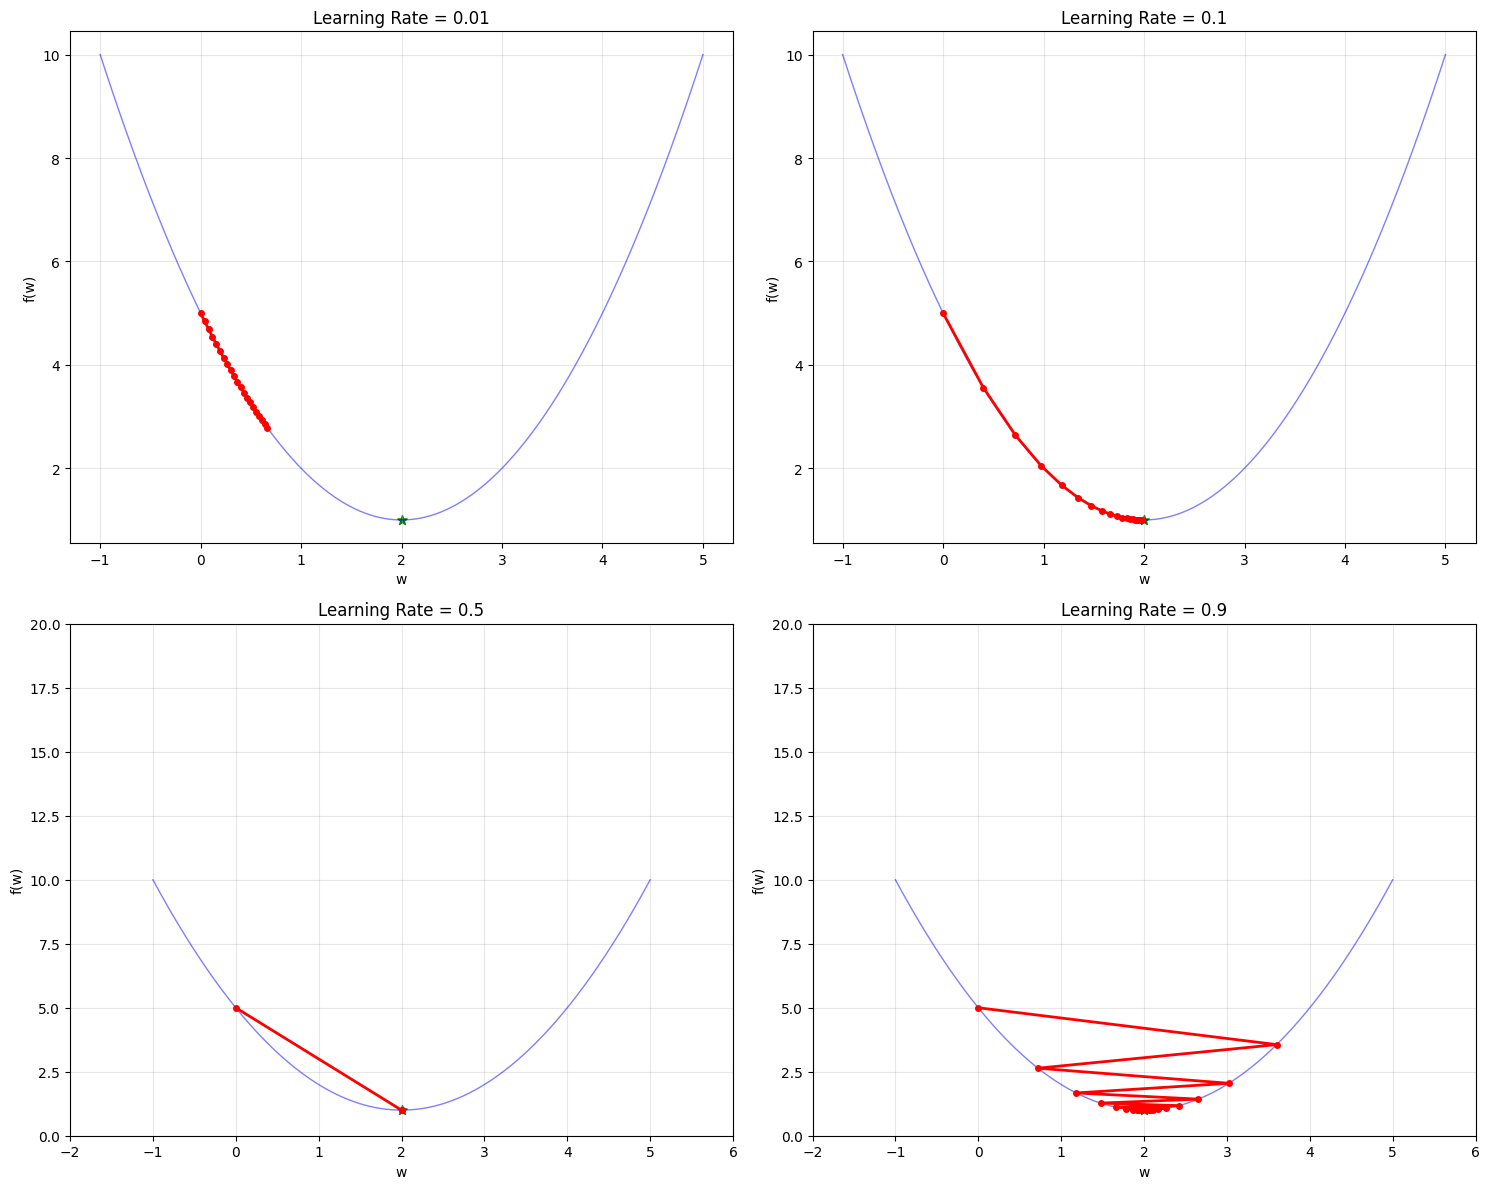

In [8]:
# Giả sử lớp GradientDescentVisualization đã được định nghĩa trước đó
# (Chứa các phương thức ham_mat_mat_don_gian và dao_ham_don_gian như trong code trước)

def so_sanh_learning_rate():
    """
    So sánh ảnh hưởng của các learning rate khác nhau trong Gradient Descent
    - Mục đích: Minh họa cách learning rate ảnh hưởng đến tốc độ hội tụ và tính ổn định
    - Ứng dụng: Giúp hiểu cách chọn learning rate phù hợp trong các bài toán học máy
    """
    print("=== ẢNH HƯỞNG CỦA LEARNING RATE ===")
    
    # Tạo instance của lớp GradientDescentVisualization để sử dụng các hàm mất mát và đạo hàm
    gd = GradientDescentVisualization()
    
    # Danh sách các giá trị learning rate để so sánh
    # - Các giá trị từ nhỏ (0.01) đến lớn (0.9) để quan sát hiệu ứng khác nhau
    learning_rates = [0.01, 0.1, 0.5, 0.9]
    
    # Tạo figure với 4 biểu đồ con (2x2) để hiển thị kết quả cho từng learning rate
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()  # Chuyển ma trận 2x2 thành mảng 1D để dễ lập trình
    
    # Tạo dữ liệu để vẽ hàm mất mát f(w) = (w-2)² + 1
    w_range = np.linspace(-1, 5, 1000)  # Tạo 1000 điểm từ -1 đến 5
    loss_range = [gd.ham_mat_mat_don_gian(w) for w in w_range]  # Tính f(w) cho từng điểm
    
    # Lặp qua từng learning rate
    for i, lr in enumerate(learning_rates):
        print(f"\nLearning rate = {lr}:")
        
        # Khởi tạo tham số w tại điểm bắt đầu (w = 0)
        w = 0
        # Lưu lịch sử (w, f(w)) để theo dõi quá trình tối ưu
        history = [(w, gd.ham_mat_mat_don_gian(w))]
        
        # Chạy Gradient Descent với tối đa 20 vòng lặp
        for step in range(20):
            # Tính gradient (độ dốc) tại điểm hiện tại
            gradient = gd.dao_ham_don_gian(w)
            # Cập nhật w theo công thức: w_new = w - learning_rate * gradient
            w = w - lr * gradient
            # Lưu giá trị mới vào lịch sử
            history.append((w, gd.ham_mat_mat_don_gian(w)))
            
            # Kiểm tra điều kiện dừng: nếu gradient nhỏ hơn ngưỡng 1e-6, coi như hội tụ
            # - Ứng dụng: Ngăn thuật toán chạy không cần thiết khi đã đạt điểm tối ưu
            if abs(gradient) < 1e-6:
                break
        
        # Tách lịch sử thành danh sách w và f(w) để vẽ biểu đồ
        w_history = [point[0] for point in history]
        loss_history = [point[1] for point in history]
        
        # In kết quả cho learning rate hiện tại
        print(f"  Số bước để hội tụ: {len(history)-1}")
        print(f"  w cuối cùng: {w:.6f}")
        print(f"  Sai số: {abs(w - 2):.6f}")
        
        # Vẽ biểu đồ cho learning rate hiện tại
        # - Vẽ hàm mất mát f(w) = (w-2)² + 1 (đường màu xanh lam)
        axes[i].plot(w_range, loss_range, 'b-', linewidth=1, alpha=0.5)
        # - Vẽ đường đi của w qua các vòng lặp (điểm đỏ nối bằng đường)
        axes[i].plot(w_history, loss_history, 'ro-', markersize=4, linewidth=2)
        # - Đánh dấu điểm tối ưu lý thuyết (w=2, f(w)=1) bằng dấu sao xanh
        axes[i].scatter(2, 1, color='green', s=50, marker='*')
        # - Đặt tiêu đề và nhãn trục
        axes[i].set_title(f'Learning Rate = {lr}')
        axes[i].set_xlabel('w')
        axes[i].set_ylabel('f(w)')
        axes[i].grid(True, alpha=0.3)
        
        # Điều chỉnh giới hạn trục cho các learning rate lớn (0.5, 0.9)
        # - Lý do: Learning rate lớn có thể khiến w dao động mạnh, cần mở rộng trục để thấy rõ
        if lr >= 0.5:
            axes[i].set_xlim(-2, 6)
            axes[i].set_ylim(0, 20)
    
    # Điều chỉnh bố cục và hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

# Gọi hàm để chạy minh họa
so_sanh_learning_rate()

=== KIỂM TRA LỚP HỒI QUY TUYẾN TÍNH ===
Dữ liệu test: (100, 1), mối quan hệ thật: y = 3x + 2 + noise
Khởi tạo trọng số: [0.00013002 0.01453534]

=== BẮT ĐẦU HUẤN LUYỆN ===
Dữ liệu: 100 mẫu, 1 đặc trưng
Learning rate: 0.01
Số vòng lặp tối đa: 1000

Vòng lặp | MSE      | Thay đổi MSE
----------------------------------------
       0 | 372.294987 | +inf
       1 | 156.855910 | +215.439077
       2 | 66.573431 | +90.282479
       3 | 28.738543 | +37.834888
       4 | 12.882123 | +15.856421
       5 | 6.235910 | +6.646213
       6 | 3.449293 | +2.786617
       7 | 2.280067 | +1.169225
       8 | 1.788625 | +0.491442
       9 | 1.581217 | +0.207408
     100 | 1.241034 | +0.340184
     200 | 1.096966 | +0.144068
     300 | 1.000672 | +0.096294
     400 | 0.936311 | +0.064362
     500 | 0.893292 | +0.043019
     600 | 0.864539 | +0.028753
     700 | 0.845321 | +0.019218
     800 | 0.832475 | +0.012845
     900 | 0.823890 | +0.008586

=== HOÀN THÀNH HUẤN LUYỆN ===
Bias (w₀): 2.029186
Trọng số 1

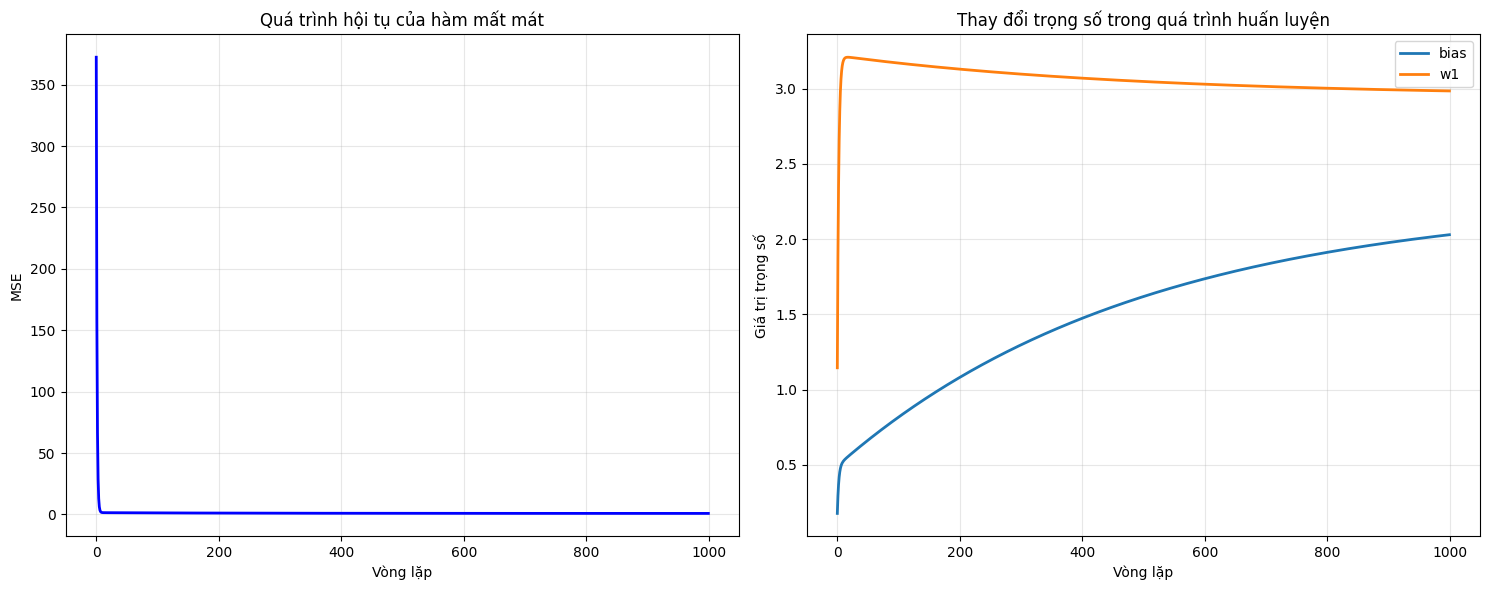

In [9]:
class HoiQuyTuyenTinhTuDau:
    """
    Lớp hồi quy tuyến tính được xây dựng từ đầu sử dụng Gradient Descent
    - Mục đích: Triển khai mô hình hồi quy tuyến tính để dự đoán giá trị liên tục
    - Ứng dụng: Minh họa cách huấn luyện mô hình học máy cơ bản với Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, fit_intercept=True):
        """
        Khởi tạo mô hình hồi quy tuyến tính
        - learning_rate: Tỷ lệ học cho Gradient Descent, kiểm soát kích thước bước cập nhật
        - n_iterations: Số vòng lặp tối đa để huấn luyện
        - fit_intercept: Quyết định có thêm bias (hệ số chặn) vào mô hình hay không
        - Ứng dụng: Các tham số này cho phép tùy chỉnh mô hình phù hợp với bài toán
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.fit_intercept = fit_intercept
        
        # Lưu trữ lịch sử huấn luyện để theo dõi quá trình tối ưu
        self.cost_history = []  # Lưu giá trị hàm mất mát (MSE) qua các vòng lặp
        self.weights_history = []  # Lưu giá trị trọng số qua các vòng lặp
        
        # Tham số mô hình
        self.weights = None  # Trọng số (bao gồm cả bias nếu fit_intercept=True)
        self.bias = None  # Không sử dụng riêng, tích hợp trong weights
        
        # Thông tin về dữ liệu
        self.n_samples = None  # Số mẫu
        self.n_features = None  # Số đặc trưng
    
    def _them_bias_vao_X(self, X):
        """
        Thêm cột bias (toàn số 1) vào ma trận đặc trưng X
        - Nếu fit_intercept=True, thêm cột 1 để tính bias trong mô hình (y = w₀ + w₁x₁ + ...)
        - Ứng dụng: Cho phép mô hình học hệ số chặn (bias) như một phần của trọng số
        """
        if self.fit_intercept:
            bias_column = np.ones((X.shape[0], 1))  # Tạo cột toàn 1
            return np.concatenate([bias_column, X], axis=1)  # Ghép cột bias vào X
        return X
    
    def _khoi_tao_tham_so(self, n_features):
        """
        Khởi tạo trọng số ngẫu nhiên
        - Tạo trọng số với giá trị nhỏ ngẫu nhiên theo phân phối chuẩn (mean=0, std=0.01)
        - Nếu fit_intercept=True, thêm một trọng số cho bias
        - Ứng dụng: Khởi tạo ngẫu nhiên giúp tránh bias ban đầu và bắt đầu quá trình tối ưu
        """
        if self.fit_intercept:
            self.weights = np.random.normal(0, 0.01, n_features + 1)  # Bao gồm bias
        else:
            self.weights = np.random.normal(0, 0.01, n_features)  # Không bao gồm bias
        print(f"Khởi tạo trọng số: {self.weights}")
    
    def _tinh_du_doan(self, X):
        """
        Tính dự đoán: y = X @ weights
        - X: Ma trận đặc trưng (có thêm cột bias nếu fit_intercept=True)
        - weights: Vector trọng số (bao gồm bias nếu có)
        - Ứng dụng: Tính giá trị dự đoán dựa trên mô hình tuyến tính
        """
        X_with_bias = self._them_bias_vao_X(X)
        return X_with_bias @ self.weights  # Phép nhân ma trận
    
    def _tinh_ham_mat_mat(self, y_true, y_pred):
        """
        Tính hàm mất mát Mean Squared Error (MSE)
        - MSE = (1/n) * Σ(y_true - y_pred)²
        - Ứng dụng: Đánh giá mức độ sai lệch giữa dự đoán và giá trị thực
        """
        return np.mean((y_true - y_pred) ** 2)
    
    def _tinh_gradient(self, X, y_true, y_pred):
        """
        Tính gradient của hàm mất mát MSE
        - Gradient = (1/m) * X^T * (y_pred - y_true), với m là số mẫu
        - Ứng dụng: Gradient chỉ hướng và độ lớn cần cập nhật trọng số để giảm MSE
        """
        X_with_bias = self._them_bias_vao_X(X)
        m = X.shape[0]  # Số mẫu
        gradient = (1/m) * X_with_bias.T @ (y_pred - y_true)  # Công thức gradient
        return gradient
    
    def huan_luyen(self, X, y, verbose=True):
        """
        Huấn luyện mô hình sử dụng Gradient Descent
        - X: Ma trận đặc trưng
        - y: Vector giá trị mục tiêu
        - verbose: In tiến trình huấn luyện nếu True
        - Ứng dụng: Tối ưu hóa trọng số để giảm thiểu hàm mất mát
        """
        # Chuyển đổi dữ liệu thành numpy array để tính toán
        X = np.array(X)
        y = np.array(y)
        
        # Lưu thông tin dữ liệu
        self.n_samples, self.n_features = X.shape
        
        # Khởi tạo tham số
        self._khoi_tao_tham_so(self.n_features)
        
        if verbose:
            print(f"\n=== BẮT ĐẦU HUẤN LUYỆN ===")
            print(f"Dữ liệu: {self.n_samples} mẫu, {self.n_features} đặc trưng")
            print(f"Learning rate: {self.learning_rate}")
            print(f"Số vòng lặp tối đa: {self.n_iterations}")
            print()
            print("Vòng lặp | MSE      | Thay đổi MSE")
            print("-" * 40)
        
        # Khởi tạo biến để theo dõi hội tụ
        previous_cost = float('inf')
        
        # Vòng lặp Gradient Descent
        for i in range(self.n_iterations):
            # Tính dự đoán
            y_pred = self._tinh_du_doan(X)
            
            # Tính hàm mất mát
            cost = self._tinh_ham_mat_mat(y, y_pred)
            
            # Tính gradient
            gradient = self._tinh_gradient(X, y, y_pred)
            
            # Cập nhật trọng số theo công thức: w = w - learning_rate * gradient
            self.weights = self.weights - self.learning_rate * gradient
            
            # Lưu lịch sử để trực quan hóa
            self.cost_history.append(cost)
            self.weights_history.append(self.weights.copy())
            
            # In tiến trình mỗi 100 vòng lặp hoặc 10 vòng lặp đầu tiên
            if verbose and (i % 100 == 0 or i < 10):
                cost_change = previous_cost - cost  # Thay đổi MSE so với vòng trước
                print(f"{i:8d} | {cost:8.6f} | {cost_change:+.6f}")
                previous_cost = cost
            
            # Kiểm tra hội tụ: dừng nếu thay đổi MSE nhỏ hơn 1e-8
            if i > 0 and abs(self.cost_history[i] - self.cost_history[i-1]) < 1e-8:
                if verbose:
                    print(f"Hội tụ tại vòng lặp {i}")
                break
        
        if verbose:
            print(f"\n=== HOÀN THÀNH HUẤN LUYỆN ===")
            if self.fit_intercept:
                print(f"Bias (w₀): {self.weights[0]:.6f}")
                for j in range(1, len(self.weights)):
                    print(f"Trọng số {j} (w₁): {self.weights[j]:.6f}")
            else:
                for j in range(len(self.weights)):
                    print(f"Trọng số {j+1}: {self.weights[j]:.6f}")
            print(f"MSE cuối cùng: {self.cost_history[-1]:.6f}")
    
    def du_doan(self, X):
        """
        Dự đoán trên dữ liệu mới
        - Ứng dụng: Sử dụng trọng số đã huấn luyện để dự đoán giá trị y cho dữ liệu mới
        """
        if self.weights is None:
            raise ValueError("Mô hình chưa được huấn luyện!")  # Kiểm tra mô hình đã huấn luyện chưa
        X = np.array(X)
        return self._tinh_du_doan(X)
    
    def danh_gia(self, X, y):
        """
        Đánh giá mô hình trên tập dữ liệu
        - Tính các chỉ số: MSE, RMSE, R²
        - Ứng dụng: Đánh giá chất lượng mô hình trên dữ liệu kiểm tra
        """
        y_pred = self.du_doan(X)
        mse = self._tinh_ham_mat_mat(y, y_pred)
        
        # Tính R²: Hệ số xác định, đo lường mức độ phù hợp của mô hình
        ss_res = np.sum((y - y_pred) ** 2)  # Tổng bình phương sai số
        ss_tot = np.sum((y - np.mean(y)) ** 2)  # Tổng bình phương tổng
        r2 = 1 - (ss_res / ss_tot)  # R² = 1 - (SS_res / SS_tot)
        
        return {
            'MSE': mse,
            'RMSE': np.sqrt(mse),  # Căn bậc hai của MSE
            'R²': r2  # Hệ số xác định
        }
    
    def ve_qua_trinh_huan_luyen(self):
        """
        Vẽ biểu đồ quá trình huấn luyện
        - Biểu đồ 1: Sự hội tụ của hàm mất mát (MSE)
        - Biểu đồ 2: Thay đổi của các trọng số qua các vòng lặp
        - Ứng dụng: Giúp hiểu trực quan quá trình học của mô hình
        """
        if not self.cost_history:
            print("Chưa có dữ liệu huấn luyện để vẽ!")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Biểu đồ 1: Sự hội tụ của hàm mất mát
        axes[0].plot(self.cost_history, 'b-', linewidth=2)
        axes[0].set_xlabel('Vòng lặp')
        axes[0].set_ylabel('MSE')
        axes[0].set_title('Quá trình hội tụ của hàm mất mát')
        axes[0].grid(True, alpha=0.3)
        
        # Biểu đồ 2: Thay đổi trọng số
        weights_array = np.array(self.weights_history)  # Chuyển lịch sử trọng số thành mảng
        n_weights_to_show = min(5, weights_array.shape[1])  # Chỉ hiển thị tối đa 5 trọng số
        
        for i in range(n_weights_to_show):
            label = f'bias' if i == 0 and self.fit_intercept else f'w{i}'
            axes[1].plot(weights_array[:, i], label=label, linewidth=2)
        
        axes[1].set_xlabel('Vòng lặp')
        axes[1].set_ylabel('Giá trị trọng số')
        axes[1].set_title('Thay đổi trọng số trong quá trình huấn luyện')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Test lớp với dữ liệu đơn giản
print("=== KIỂM TRA LỚP HỒI QUY TUYẾN TÍNH ===")

# Tạo dữ liệu test
np.random.seed(42)  # Đặt seed để kết quả tái lập
n_samples = 100
X_test = np.random.uniform(1, 10, (n_samples, 1))  # Dữ liệu đặc trưng ngẫu nhiên
y_test = 3 * X_test.flatten() + 2 + np.random.normal(0, 1, n_samples)  # y = 3x + 2 + nhiễu

print(f"Dữ liệu test: {X_test.shape}, mối quan hệ thật: y = 3x + 2 + noise")

# Tạo và huấn luyện mô hình
model = HoiQuyTuyenTinhTuDau(learning_rate=0.01, n_iterations=1000)
model.huan_luyen(X_test, y_test)

# Đánh giá mô hình
results = model.danh_gia(X_test, y_test)
print(f"\nKết quả đánh giá:")
for metric, value in results.items():
    print(f"{metric}: {value:.6f}")

# Vẽ biểu đồ quá trình huấn luyện
model.ve_qua_trinh_huan_luyen()

=== BÀI THỰC HÀNH: DỰ ĐOÁN GIÁ NHÀ BOSTON ===
Dữ liệu nhà ở Boston (mô phỏng):
   ty_le_toi_pham  so_phong_tb  tuoi_nha_phan_tram  khoang_cach_trung_tam  \
0        1.407804     5.375837           33.511885               0.371138   
1        9.030364     7.582021           74.350826               5.102189   
2        3.950237     7.125608           16.075990               1.437125   
3        2.738828     5.971577           81.796702               6.310571   
4        0.508875     5.100806           83.213418               6.076149   

   thue_bat_dong_san    gia_nha  
0         274.948756  50.000000  
1         610.372619  50.000000  
2         303.601849  50.000000  
3         503.585051  47.602112  
4         531.782815  39.449109  

Kích thước dữ liệu: (506, 6)

Thống kê mô tả:
       ty_le_toi_pham  so_phong_tb  tuoi_nha_phan_tram  khoang_cach_trung_tam  \
count      506.000000   506.000000          506.000000             506.000000   
mean         3.008915     6.312621           

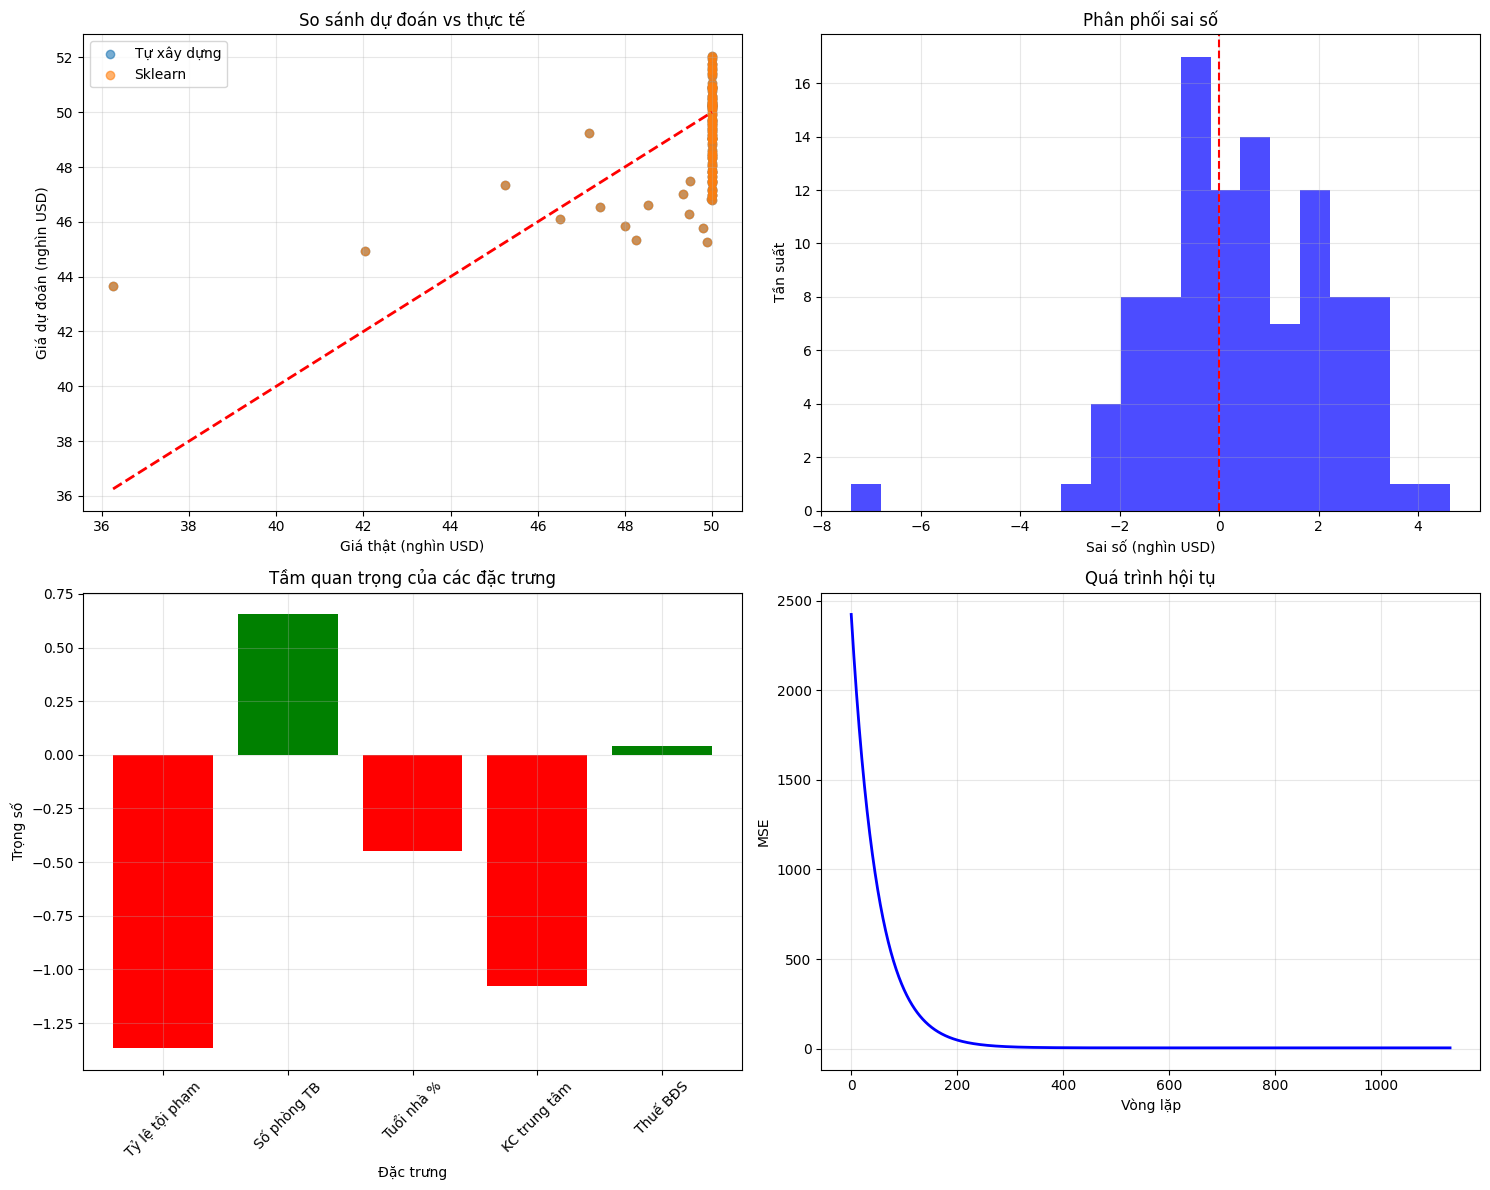

In [10]:
def bai_thuc_hanh_gia_nha_boston():
    """
    Bài thực hành dự đoán giá nhà Boston
    - Mục đích: Áp dụng mô hình hồi quy tuyến tính tự xây dựng (HoiQuyTuyenTinhTuDau)
      để dự đoán giá nhà dựa trên dữ liệu mô phỏng, minh họa quy trình học máy cơ bản.
    - Ứng dụng: Giúp hiểu cách huấn luyện, đánh giá mô hình, và so sánh với công cụ
      chuyên nghiệp (scikit-learn), đồng thời áp dụng vào bài toán thực tế như dự đoán giá nhà.
    - Kiến thức liên quan: Hồi quy tuyến tính, Gradient Descent, chuẩn hóa dữ liệu,
      chia tập train/test, đánh giá mô hình (MSE, R²).
    """
    print("=== BÀI THỰC HÀNH: DỰ ĐOÁN GIÁ NHÀ BOSTON ===")
    
    # Đặt hạt giống ngẫu nhiên để đảm bảo kết quả tái lập
    np.random.seed(42)  # Hạt giống 42 là giá trị phổ biến để kiểm soát tính ngẫu nhiên,
                        # đảm bảo kết quả có thể tái hiện cho mục đích kiểm tra
    n_samples = 506  # Số lượng mẫu, được chọn dựa trên kích thước thực tế của dataset Boston Housing
                     # (506 mẫu là số mẫu gốc trong tập dữ liệu Boston Housing)

    # Tạo các đặc trưng ngẫu nhiên để mô phỏng dữ liệu Boston Housing
    # Các đặc trưng được sinh từ các phân phối phù hợp với đặc điểm thực tế
    crime_rate = np.random.exponential(3, n_samples)  # Tỷ lệ tội phạm, phân phối mũ với tham số 3
    # - Phân phối mũ mô phỏng dữ liệu lệch phải (nhiều giá trị nhỏ, ít giá trị lớn)
    # - Tham số 3 điều chỉnh tỷ lệ trung bình khoảng 1/3, phản ánh thực tế tội phạm thường thấp
    room_avg = np.random.normal(6.3, 0.7, n_samples)  # Số phòng trung bình
    # - Phân phối chuẩn với trung bình 6.3 (dựa trên thống kê Boston Housing)
    # - Độ lệch chuẩn 0.7 phản ánh biến động thực tế trong số phòng
    age = np.random.uniform(0, 100, n_samples)  # Tuổi nhà (%)
    # - Phân phối đều trong [0, 100] mô phỏng phần trăm tuổi nhà, đại diện cho mức độ cũ mới
    distance = np.random.exponential(3, n_samples)  # Khoảng cách đến trung tâm
    # - Phân phối mũ với tham số 3, tương tự crime_rate, mô phỏng khoảng cách lệch phải
    tax_rate = np.random.uniform(150, 700, n_samples)  # Thuế bất động sản
    # - Phân phối đều trong [150, 700] dựa trên phạm vi thuế thực tế (nghìn USD)
    
    # Tạo giá nhà dựa trên logic tuyến tính với nhiễu ngẫu nhiên
    price = (25 - 2*crime_rate + 9*room_avg - 0.1*age - 1.5*distance - 0.01*tax_rate + 
             np.random.normal(0, 3, n_samples))
    # - 25: Giá trị cơ bản (intercept), đại diện cho giá khởi điểm khi các yếu tố khác bằng 0
    # - -2*crime_rate: Tỷ lệ tội phạm giảm giá nhà (hệ số âm, phản ánh tác động tiêu cực)
    # - 9*room_avg: Số phòng tăng giá nhà (hệ số dương lớn do ảnh hưởng mạnh mẽ)
    # - -0.1*age: Tuổi nhà giảm giá (hệ số âm nhỏ, tuổi cao làm giảm giá nhẹ)
    # - -1.5*distance: Khoảng cách giảm giá (hệ số âm, xa trung tâm giảm giá)
    # - -0.01*tax_rate: Thuế giảm giá (hệ số âm nhỏ, thuế cao làm giảm giá nhẹ)
    # - np.random.normal(0, 3, n_samples): Nhiễu ngẫu nhiên với trung bình 0, độ lệch chuẩn 3
    #   mô phỏng biến động thực tế trong giá nhà do các yếu tố không đo lường được
    price = np.clip(price, 5, 50)  # Giới hạn giá trong [5, 50] nghìn USD để tránh giá bất thường
    # - np.clip đảm bảo giá nằm trong phạm vi hợp lý dựa trên dữ liệu Boston Housing
    # - Kết luận: Mô hình tuyến tính với nhiễu phản ánh mối quan hệ thực tế giữa các đặc trưng và giá nhà
    
    # Tạo DataFrame để tổ chức dữ liệu
    data = pd.DataFrame({
        'ty_le_toi_pham': crime_rate,  # Cột 1: Tỷ lệ tội phạm
        'so_phong_tb': room_avg,      # Cột 2: Số phòng trung bình
        'tuoi_nha_phan_tram': age,    # Cột 3: Tuổi nhà (%)
        'khoang_cach_trung_tam': distance,  # Cột 4: Khoảng cách đến trung tâm
        'thue_bat_dong_san': tax_rate,      # Cột 5: Thuế bất động sản
        'gia_nha': price                  # Cột 6: Giá nhà (mục tiêu)
    })
    
    # In thông tin cơ bản về dữ liệu
    print("Dữ liệu nhà ở Boston (mô phỏng):")
    print(data.head())  # In 5 dòng đầu để kiểm tra dữ liệu, giúp đánh giá ban đầu
    print(f"\nKích thước dữ liệu: {data.shape}")  # In kích thước (506, 6)
    print(f"\nThống kê mô tả:")
    print(data.describe())  # In thống kê (min, max, mean, std, etc.) cho từng cột
    # - Kết luận: Thống kê mô tả cung cấp cái nhìn tổng quan về phân phối dữ liệu,
    #   giúp xác định cần chuẩn hóa hay không
    
    # Chuẩn bị dữ liệu cho huấn luyện
    X = data.drop('gia_nha', axis=1).values  # Lấy tất cả cột trừ 'gia_nha' làm đặc trưng
    # - .values chuyển DataFrame thành mảng numpy với shape (506, 5)
    y = data['gia_nha'].values  # Lấy cột 'gia_nha' làm giá trị mục tiêu, shape (506,)
    
    # Chuẩn hóa đặc trưng để cải thiện hiệu quả Gradient Descent
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()  # Tạo đối tượng chuẩn hóa
    X_scaled = scaler.fit_transform(X)  # Chuẩn hóa X về trung bình 0, độ lệch chuẩn 1
    # - fit_transform tính trung bình và độ lệch chuẩn từ dữ liệu, sau đó áp dụng
    # - Kết luận: Chuẩn hóa đảm bảo Gradient Descent hội tụ nhanh hơn,
    #   đặc biệt với các đặc trưng có thang đo khác nhau (ví dụ: crime_rate, tax_rate)
    
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    # - test_size=0.2: 20% dữ liệu (khoảng 101 mẫu) cho tập kiểm tra
    # - 80% (khoảng 405 mẫu) cho tập huấn luyện
    # - random_state=42 đảm bảo tái lập kết quả
    print(f"\nDữ liệu huấn luyện: {X_train.shape}")  # In shape (404, 5)
    print(f"Dữ liệu kiểm tra: {X_test.shape}")  # In shape (102, 5)
    # - Kết luận: Chia tập dữ liệu giúp đánh giá mô hình trên dữ liệu chưa thấy,
    #   giảm nguy cơ overfitting (học quá mức trên tập train)
    
    # Huấn luyện mô hình tự xây dựng
    print(f"\n=== HUẤN LUYỆN MÔ HÌNH TỰ XÂY DỰNG ===")
    custom_model = HoiQuyTuyenTinhTuDau(learning_rate=0.01, n_iterations=3000)
    # - learning_rate=0.01: Tỷ lệ học nhỏ để đảm bảo hội tụ ổn định,
    #   tránh dao động do bước cập nhật quá lớn
    # - n_iterations=3000: Số vòng lặp tối đa, tăng để xử lý dữ liệu phức tạp hơn
    #   so với ví dụ đơn giản trước đó (1000 vòng)
    custom_model.huan_luyen(X_train, y_train, verbose=True)
    # - Huấn luyện trên tập train, in tiến trình nếu verbose=True
    # - Kết luận: Quá trình huấn luyện sử dụng Gradient Descent để tối ưu hóa MSE,
    #   minh họa cách mô hình học từ dữ liệu thực tế
    
    # Dự đoán và đánh giá mô hình tự xây dựng
    y_pred_custom = custom_model.du_doan(X_test)  # Dự đoán trên tập test
    results_custom = custom_model.danh_gia(X_test, y_test)  # Đánh giá với MSE, RMSE, R²
    # - Kết luận: Đánh giá trên tập test cung cấp thước đo hiệu suất thực tế,
    #   với MSE đo sai số trung bình, RMSE đo sai số tuyệt đối, R² đo mức độ giải thích
    
    # Huấn luyện mô hình scikit-learn để so sánh
    sklearn_model = LinearRegression()  # Tạo mô hình LinearRegression
    # - Sử dụng thuật toán tối ưu hóa tích hợp (thường là SVD hoặc Gradient Descent tùy dữ liệu)
    sklearn_model.fit(X_train, y_train)  # Huấn luyện trên tập train
    y_pred_sklearn = sklearn_model.predict(X_test)  # Dự đoán trên tập test
    # - Kết luận: So sánh với scikit-learn giúp đánh giá độ chính xác và hiệu quả
    #   của mô hình tự xây dựng so với công cụ chuyên nghiệp
    
    # So sánh kết quả
    print(f"\n=== KẾT QUẢ CUỐI CÙNG ===")
    print(f"Mô hình tự xây dựng:")
    for metric, value in results_custom.items():
        print(f"  {metric}: {value:.4f}")  # In MSE, RMSE, R² với 4 chữ số thập phân
    print(f"\nSklearn LinearRegression:")
    print(f"  MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}")  # Tính MSE
    print(f"  R²: {r2_score(y_test, y_pred_sklearn):.4f}")  # Tính R²
    # - Kết luận: So sánh MSE và R² giữa hai mô hình giúp xác định mô hình nào
    #   tốt hơn, với R² gần 1 và MSE thấp là dấu hiệu của mô hình hiệu quả
    
    # Phân tích trọng số
    print(f"\n=== PHÂN TÍCH TRỌNG SỐ ===")
    feature_names = ['Tỷ lệ tội phạm', 'Số phòng TB', 'Tuổi nhà %', 'KC trung tâm', 'Thuế BĐS']
    # - Danh sách tên đặc trưng tương ứng với cột trong X
    
    print("Tầm quan trọng của các đặc trưng:")
    if custom_model.fit_intercept:
        weights = custom_model.weights[1:]  # Lấy trọng số của các đặc trưng, bỏ bias
    else:
        weights = custom_model.weights  # Lấy toàn bộ trọng số nếu không có bias
    for i, (name, weight) in enumerate(zip(feature_names, weights)):
        print(f"  {name}: {weight:.4f}")  # In trọng số với 4 chữ số thập phân
        if weight > 0:
            print(f"    → Tăng 1 đơn vị làm tăng giá nhà {weight:.4f} nghìn USD")
        else:
            print(f"    → Tăng 1 đơn vị làm giảm giá nhà {abs(weight):.4f} nghìn USD")
    # - Kết luận: Trọng số cho thấy ảnh hưởng định lượng của từng đặc trưng,
    #   ví dụ: Số phòng TB có trọng số dương lớn (9 trong mô phỏng) do ảnh hưởng mạnh,
    #   phản ánh mối quan hệ tuyến tính học được
    
    # Vẽ biểu đồ phân tích
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Tạo 4 biểu đồ con (2x2)
    
    # 1. So sánh dự đoán vs thực tế
    axes[0, 0].scatter(y_test, y_pred_custom, alpha=0.6, label='Tự xây dựng')
    # - Vẽ điểm dự đoán của mô hình tự xây dựng, alpha=0.6 cho độ trong suốt
    axes[0, 0].scatter(y_test, y_pred_sklearn, alpha=0.6, label='Sklearn')
    # - Vẽ điểm dự đoán của mô hình scikit-learn
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    # - Vẽ đường chéo đỏ để so sánh dự đoán với giá thật (dự đoán hoàn hảo nằm trên đường)
    axes[0, 0].set_xlabel('Giá thật (nghìn USD)')
    axes[0, 0].set_ylabel('Giá dự đoán (nghìn USD)')
    axes[0, 0].set_title('So sánh dự đoán vs thực tế')
    axes[0, 0].legend()  # Hiển thị chú thích
    axes[0, 0].grid(True, alpha=0.3)  # Thêm lưới với độ trong suốt 0.3
    # - Kết luận: Biểu đồ scatter so sánh trực quan độ chính xác,
    #   điểm gần đường chéo đỏ cho thấy dự đoán tốt
    
    # 2. Phân tích sai số
    errors_custom = y_test - y_pred_custom  # Tính sai số của mô hình tự xây dựng
    axes[0, 1].hist(errors_custom, bins=20, alpha=0.7, color='blue')
    # - Vẽ histogram sai số với 20 bins, màu xanh, độ trong suốt 0.7
    axes[0, 1].axvline(0, color='red', linestyle='--')  # Vẽ đường thẳng tại sai số 0
    axes[0, 1].set_xlabel('Sai số (nghìn USD)')
    axes[0, 1].set_ylabel('Tần suất')
    axes[0, 1].set_title('Phân phối sai số')
    axes[0, 1].grid(True, alpha=0.3)  # Thêm lưới
    # - Kết luận: Phân phối sai số tập trung quanh 0 với độ lệch nhỏ
    #   là dấu hiệu của mô hình tốt, giúp đánh giá độ tin cậy
    
    # 3. Tầm quan trọng đặc trưng
    axes[1, 0].bar(range(len(feature_names)), weights, color=['red' if w < 0 else 'green' for w in weights])
    # - Vẽ biểu đồ cột với trọng số, màu đỏ nếu âm, xanh nếu dương
    axes[1, 0].set_xlabel('Đặc trưng')
    axes[1, 0].set_ylabel('Trọng số')
    axes[1, 0].set_title('Tầm quan trọng của các đặc trưng')
    axes[1, 0].set_xticks(range(len(feature_names)))  # Đặt vị trí nhãn trục x
    axes[1, 0].set_xticklabels(feature_names, rotation=45)  # Nhãn đặc trưng, xoay 45 độ
    axes[1, 0].grid(True, alpha=0.3)  # Thêm lưới
    # - Kết luận: Biểu đồ cột trực quan hóa ảnh hưởng của đặc trưng,
    #   liên quan đến khái niệm "feature importance" trong học máy
    
    # 4. Quá trình hội tụ
    axes[1, 1].plot(custom_model.cost_history, 'b-', linewidth=2)
    # - Vẽ đường cong MSE qua các vòng lặp, màu xanh, độ dày 2
    axes[1, 1].set_xlabel('Vòng lặp')
    axes[1, 1].set_ylabel('MSE')
    axes[1, 1].set_title('Quá trình hội tụ')
    axes[1, 1].grid(True, alpha=0.3)  # Thêm lưới
    # - Kết luận: Đường cong MSE giảm dần cho thấy Gradient Descent hiệu quả,
    #   minh họa khái niệm hội tụ trong tối ưu hóa, một nền tảng quan trọng
    #   cho các thuật toán học máy khác (ví dụ: SGD, Adam)
    
    plt.tight_layout()  # Điều chỉnh bố cục để tránh chồng lấn
    plt.show()  # Hiển thị biểu đồ
    # - Kết luận: Trực quan hóa giúp hiểu rõ hiệu suất và quá trình học,
    #   hỗ trợ phân tích và cải tiến mô hình
    
    # Trả về dữ liệu và mô hình để sử dụng sau
    return data, custom_model, sklearn_model
    # - Kết luận: Trả về dữ liệu và mô hình cho phép phân tích sâu hơn
    #   hoặc tái sử dụng trong các bài toán khác

# Chạy bài thực hành
data_boston, model_custom, model_sklearn = bai_thuc_hanh_gia_nha_boston()